# House Prices: Advanced Regression Techniques

## Predict sales prices and practice feature engineering, RFs, and gradient boosting

### Neil Mistry - Nov 1, 2018

This notebook explores the Ames Housing dataset was compiled by Dean De Cock for use in data science education.  You may find the dataset hosted on Kaggle.com, as well as exploratory and data-modelling kernels hosted at this link:  https://www.kaggle.com/c/house-prices-advanced-regression-techniques

### In this notebook we will:

1. Load the data

2. Explore the data

3. Transform the data to suit modelling

4. Create a few different models that can predict the 'SalePrice' of the homes based on the feature data


#### In addition we want to use this notebook to answer the following real estate questions:

1. What features are most important to determining the price of a home?

2. Is there a particular time of the year a home can sell for more money? or less money?

3. Can we accurately predict the price that a home will sell for with descriptive data on a home? Using a simple model?

## Data Loading

In [1]:
#import packages required
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
os.listdir()

['.ipynb_checkpoints',
 '20181109 - pipeline.ipynb',
 'data_description.txt',
 'sample_submission.csv',
 'submissions.csv',
 'test.csv',
 'train.csv']

In [3]:
#import training and testing data and store into dataframes

train = pd.read_csv('train.csv')

test = pd.read_csv('test.csv')

In [4]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
# retreive shape of train dataframe

print (train.shape, test.shape)

(1460, 81) (1459, 80)


In [6]:
#checking for target variables

print("Target variable : ", set(train.columns).difference(set(test.columns)))

Target variable :  {'SalePrice'}


In [7]:
train_size = train.shape[0]
test_size = test.shape[0]
columns = test.shape[1]
print (train_size, test_size, columns)

1460 1459 80


In [8]:
target = train['SalePrice'].copy()

In [9]:
print(target.head())
print('\n')
print(target.shape)

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64


(1460,)


In [10]:
test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities      ...       ScreenPorch PoolArea PoolQC  Fence  \
0         Lvl    AllPub      ...               120        0    NaN  MnPrv   
1         Lvl    AllPub      ...                 0        0    NaN    NaN   
2         Lvl    AllPub      ...                 0        0    NaN  MnPrv   
3         Lvl    AllPub      ...                 0        0    NaN    NaN   
4         HLS    AllPub      ...               144        0    NaN    NaN   

  MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  
0         NaN       0      6    2010        WD         Normal  
1        Gar2   12500      6    2010        WD         Normal  
2         NaN       0      3    2010        WD         Normal  
3         NaN       0      6    2010        WD         Normal  
4         NaN       0      1    2010        WD         Normal  

[5 rows x 80 columns]

In [11]:
#we will join the test and train data for easier manipulation of columns for our modelling
frames = [train.drop(columns=['SalePrice'], axis = 1), test]
features = pd.concat(frames, ignore_index=True)

In [12]:
features.shape

(2919, 80)

# Data Preperation

In [13]:
#taking a look at the dataset, to understand its features

pd.options.display.max_columns = None
features.iloc[1600:1660]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1600  1601          30       RM         58.0     8154   Pave   NaN      Reg   
1601  1602          50       RM         50.0     9140   Pave   NaN      Reg   
1602  1603          30  C (all)         66.0     8712   Grvl   NaN      Reg   
1603  1604         120       RM         44.0     3811   Pave   NaN      IR1   
1604  1605          60       RL         85.0    11050   Pave   NaN      Reg   
1605  1606          80       RL         74.0     9620   Pave   NaN      Reg   
1606  1607          90       RL          NaN    12760   Pave   NaN      IR1   
1607  1608          20       RL         88.0    11896   Pave   NaN      IR1   
1608  1609          20       RL         73.0     9803   Pave   NaN      Reg   
1609  1610          60       RL         73.0     9802   Pave   NaN      Reg   
1610  1611          20       RL         85.0    15300   Pave   NaN      Reg   
1611  1612          20       RL         93.0    10114   Pave   NaN      Reg   
1612  1613          20       RL          NaN    11875   Pave   NaN      Reg   
1613  1614         120       RM         31.0     2394   Pave   NaN      Reg   
1614  1615         160       RM         21.0     1476   Pave   NaN      Reg   
1615  1616         160       RM         21.0     1900   Pave   NaN      Reg   
1616  1617         160       RM         21.0     1890   Pave   NaN      Reg   
1617  1618          20       RL         50.0     6953   Pave   NaN      Reg   
1618  1619          20       RL         76.0    12887   Pave   NaN      Reg   
1619  1620          90       RL         70.0     7700   Pave   NaN      Reg   
1620  1621          60       RL         63.0    10475   Pave   NaN      Reg   
1621  1622          50       RL         68.0    10544   Pave   NaN      IR1   
1622  1623          20       RL         76.0     9892   Pave   NaN      Reg   
1623  1624          60       RL         74.0    12961   Pave   NaN      Reg   
1624  1625          20       RL         74.0    13008   Pave   NaN      IR1   
1625  1626          20       RL         85.0    10200   Pave   NaN      Reg   
1626  1627          60       RL         88.0    10179   Pave   NaN      IR1   
1627  1628          60       RL          NaN    11792   Pave   NaN      IR1   
1628  1629          80       RL         60.0     8400   Pave   NaN      Reg   
1629  1630         120       RL         28.0     7296   Pave   NaN      IR1   
1630  1631         120       RL         61.0     7380   Pave   NaN      IR1   
1631  1632         120       RL         57.0     8013   Pave   NaN      IR1   
1632  1633          80       RL         57.0     8923   Pave   NaN      IR1   
1633  1634          60       RL         60.0     7500   Pave   NaN      Reg   
1634  1635          60       RL          NaN     8803   Pave   NaN      IR1   
1635  1636          20       RL         58.0     7250   Pave   NaN      Reg   
1636  1637          60       RL         85.0    11900   Pave   NaN      Reg   
1637  1638          60       RL          NaN    13250   Pave   NaN      IR1   
1638  1639          20       RL         80.0    10928   Pave   NaN      Reg   
1639  1640          60       RL          NaN    12388   Pave   NaN      IR1   
1640  1641          20       RL         80.0    11088   Pave   NaN      Reg   
1641  1642          60       FV         70.0     7000   Pave   NaN      Reg   
1642  1643          60       FV          NaN     7500   Pave   NaN      Reg   
1643  1644          60       FV          NaN     8470   Pave   NaN      Reg   
1644  1645          20       RL          NaN     9373   Pave   NaN      IR1   
1645  1646          20       RL         78.0    10140   Pave   NaN      Reg   
1646  1647          20       RL         85.0    11050   Pave   NaN      IR1   
1647  1648          20       RL          NaN     7830   Pave   NaN      IR1   
1648  1649          20       RL          NaN     8510   Pave   NaN      IR1   
1649  1650          20       RL         60.0     7038   Pa

We have a mix of categorical variables and continuous variables and a lot of nans.  We will need to encode our categorical variables, normalize our continous variables and eliminate our nan values for a simple regressive model baseline

In [14]:
#check the training set for nans

features.drop(['Id'], axis=1, inplace=True) #remove the 'Id' column because it is not needed for modelling

features.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  2919.000000  2433.000000    2919.000000  2919.000000  2919.000000   
mean     57.137718    69.305795   10168.114080     6.089072     5.564577   
std      42.517628    23.344905    7886.996359     1.409947     1.113131   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7478.000000     5.000000     5.000000   
50%      50.000000    68.000000    9453.000000     6.000000     5.000000   
75%      70.000000    80.000000   11570.000000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  2919.000000   2919.000000  2896.000000  2918.000000  2918.000000   
mean   1971.312778   1984.264474   102.201312   441.423235    49.582248   
std      30.291442     20.894344   179.334253   455.610826   169.205611   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000   
25%    1953.500000   1965.000000     0.000000     0.000000     0.000000   
50%    1973.000000   1993.000000     0.000000   368.500000     0.000000   
75%    2001.000000   2004.000000   164.000000   733.000000     0.000000   
max    2010.000000   2010.000000  1600.000000  5644.000000  1526.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  2918.000000  2918.000000  2919.000000  2919.000000   2919.000000   
mean    560.772104  1051.777587  1159.581706   336.483727      4.694416   
std     439.543659   440.766258   392.362079   428.701456     46.396825   
min       0.000000     0.000000   334.000000     0.000000      0.000000   
25%     220.000000   793.000000   876.000000     0.000000      0.000000   
50%     467.000000   989.500000  1082.000000     0.000000      0.000000   
75%     805.500000  1302.000000  1387.500000   704.000000      0.000000   
max    2336.000000  6110.000000  5095.000000  2065.000000   1064.000000   

         GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  \
count  2919.000000   2917.000000   2917.000000  2919.000000  2919.000000   
mean   1500.759849      0.429894      0.061364     1.568003     0.380267   
std     506.051045      0.524736      0.245687     0.552969     0.502872   
min     334.000000      0.000000      0.000000     0.000000     0.000000   
25%    1126.000000      0.000000      0.000000     1.000000     0.000000   
50%    1444.000000      0.000000      0.000000     2.000000     0.000000   
75%    1743.500000      1.000000      0.000000     2.000000     1.000000   
max    5642.000000      3.000000      2.000000     4.000000     2.000000   

       BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt  \
count   2919.000000   2919.000000   2919.000000  2919.000000  2760.000000   
mean       2.860226      1.044536      6.451524     0.597122  1978.113406   
std        0.822693      0.214462      1.569379     0.646129    25.574285   
min        0.000000      0.000000      2.000000     0.000000  1895.000000   
25%        2.000000      1.000000      5.000000     0.000000  1960.000000   
50%        3.000000      1.000000      6.000000     1.000000  1979.000000   
75%        3.000000      1.000000      7.000000     1.000000  2002.000000   
max        8.000000      3.000000     15.000000     4.000000  2207.000000   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  2918.000000  2918.000000  2919.000000  2919.000000    2919.000000   
mean      1.766621   472.874572    93.709832    47.486811      23.098321   
std       0.761624   215.394815   126.526589    67.575493      64.244246   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       1.000000   320.000000     0.000000     0.000000       0.000000   
50%       2.000000   480.000000     0.000000    26.000000       0.000000   
75%       2.000000   576.000000   168.000000    70.000000   

In [15]:
nans = features.isna().sum(axis=0)
nans[nans!=0].sort_values(ascending=False)

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
FireplaceQu     1420
LotFrontage      486
GarageFinish     159
GarageYrBlt      159
GarageQual       159
GarageCond       159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Utilities          2
Functional         2
Exterior2nd        1
Exterior1st        1
SaleType           1
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
Electrical         1
KitchenQual        1
GarageCars         1
GarageArea         1
TotalBsmtSF        1
dtype: int64

In [16]:
#check for constant columns

const_cols = [c for c in features.columns if features[c].nunique(dropna=False)==1 ]
const_cols

[]

In [17]:
#check for categorical variables

cat_features = list(features.dtypes[features.dtypes == 'object'].index.values)

In [18]:
print (cat_features)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [19]:
num_features = list(features.drop(cat_features, axis=1).columns)
print (num_features)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [20]:
features[num_features].iloc[0:20]

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0           60         65.0     8450            7            5       2003   
1           20         80.0     9600            6            8       1976   
2           60         68.0    11250            7            5       2001   
3           70         60.0     9550            7            5       1915   
4           60         84.0    14260            8            5       2000   
5           50         85.0    14115            5            5       1993   
6           20         75.0    10084            8            5       2004   
7           60          NaN    10382            7            6       1973   
8           50         51.0     6120            7            5       1931   
9          190         50.0     7420            5            6       1939   
10          20         70.0    11200            5            5       1965   
11          60         85.0    11924            9            5       2005   
12          20          NaN    12968            5            6       1962   
13          20         91.0    10652            7            5       2006   
14          20          NaN    10920            6            5       1960   
15          45         51.0     6120            7            8       1929   
16          20          NaN    11241            6            7       1970   
17          90         72.0    10791            4            5       1967   
18          20         66.0    13695            5            5       2004   
19          20         70.0     7560            5            6       1958   

    YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0           2003       196.0       706.0         0.0      150.0        856.0   
1           1976         0.0       978.0         0.0      284.0       1262.0   
2           2002       162.0       486.0         0.0      434.0        920.0   
3           1970         0.0       216.0         0.0      540.0        756.0   
4           2000       350.0       655.0         0.0      490.0       1145.0   
5           1995         0.0       732.0         0.0       64.0        796.0   
6           2005       186.0      1369.0         0.0      317.0       1686.0   
7           1973       240.0       859.0        32.0      216.0       1107.0   
8           1950         0.0         0.0         0.0      952.0        952.0   
9           1950         0.0       851.0         0.0      140.0        991.0   
10          1965         0.0       906.0         0.0      134.0       1040.0   
11          2006       286.0       998.0         0.0      177.0       1175.0   
12          1962         0.0       737.0         0.0      175.0        912.0   
13          2007       306.0         0.0         0.0     1494.0       1494.0   
14          1960       212.0       733.0         0.0      520.0       1253.0   
15          2001         0.0         0.0         0.0      832.0        832.0   
16          1970       180.0       578.0         0.0      426.0       1004.0   
17          1967         0.0         0.0         0.0        0.0          0.0   
18          2004         0.0       646.0         0.0      468.0       1114.0   
19          1965         0.0       504.0         0.0      525.0       1029.0   

    1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0        856       854             0       1710           1.0           0.0   
1       1262         0             0       1262           0.0           1.0   
2        920       866             0       1786           1.0           0.0   
3        961       756             0       1717           1.0           0.0   
4       1145      1053             0       2198           1.0           0.0   
5        796       566             0       1362           1.0           0.0   
6       1694         0             0       1694           1.0           0.0   
7       1107       983             0       2090           1.0           0

In [21]:
# reassign categorical and numerical features, we will leave 'YearBuilt' as numerical (continous variable), 
# however it should normally be considered categorical.  Same goes for YearRemodAdd and GarageYrBlt.

reassign_features = ['MSSubClass','OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath',
                    'HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars',
                    'MoSold','YrSold']

for feature in reassign_features:
    num_features.remove(feature)


cat_features.extend(reassign_features)

In [22]:
print (cat_features)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'MoSold', 'YrSold']


In [23]:
print (num_features)

['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']


## We begin data exploration and visualization

In [24]:
#explore our target

target.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

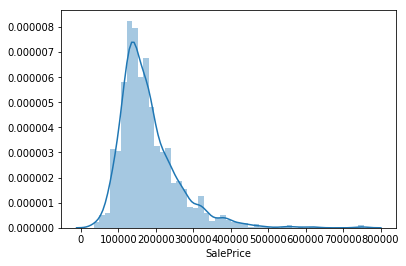

In [25]:
#distribution plot of saleprice
sns.distplot(target);

Our target variable ('SalePrice') has an appreciatibly positive skew, peaky

In [26]:
print("Skewness: %f" % target.skew())
print("Kurtosis: %f" % target.kurt())

Skewness: 1.882876
Kurtosis: 6.536282


skewness and kurtosis

kurtosis ("curved, arching") is a measure of the "tailedness" of the probability distribution of a real-valued random variable

https://en.wikipedia.org/wiki/Kurtosis

## Here we will answer Question #1: What features are most important to determining the price of a home?


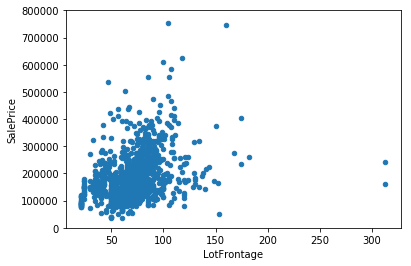

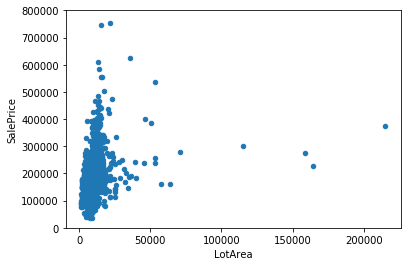

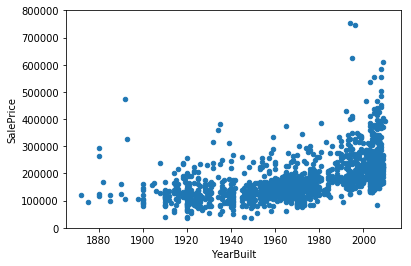

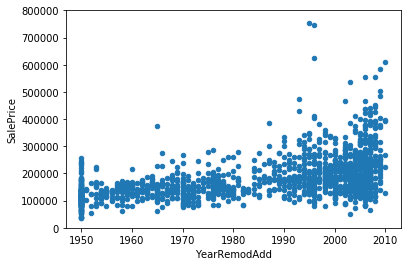

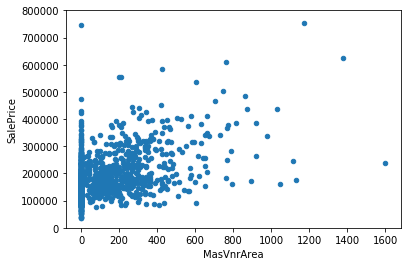

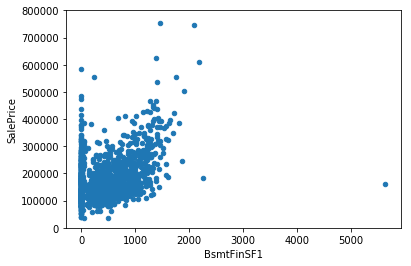

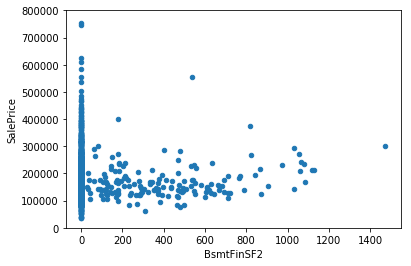

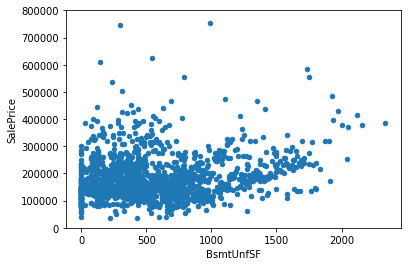

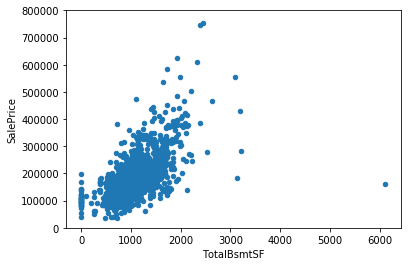

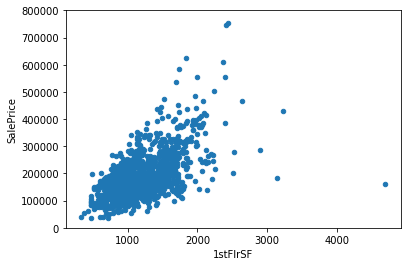

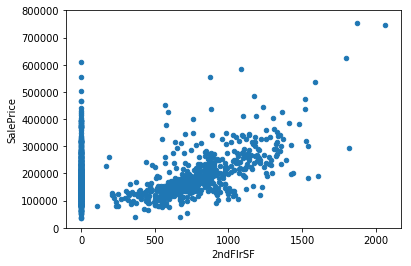

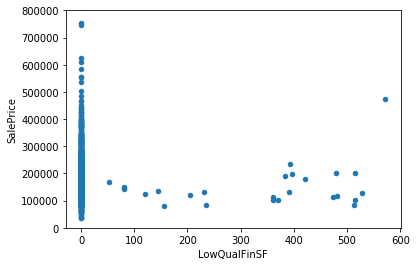

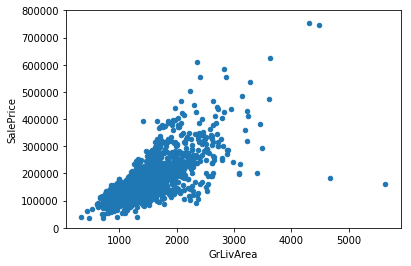

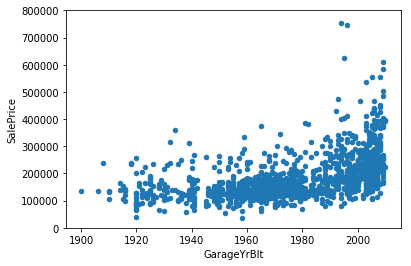

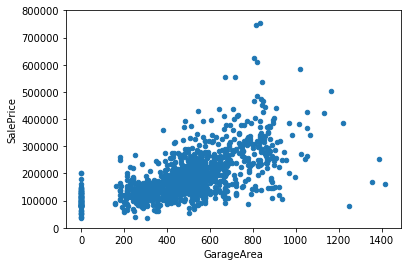

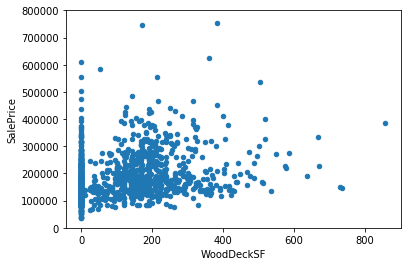

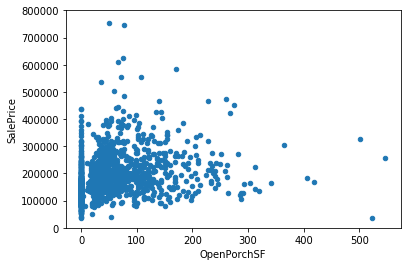

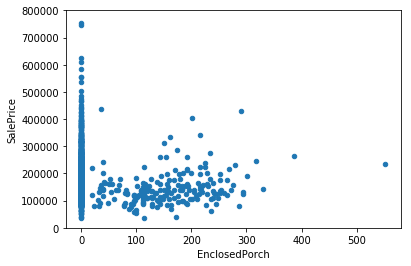

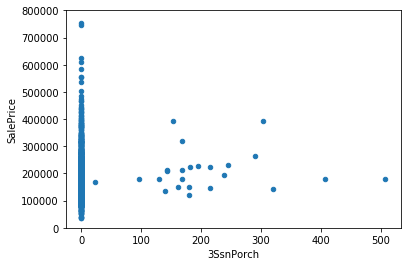

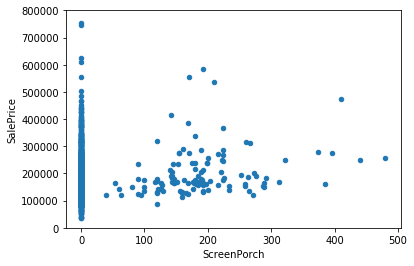

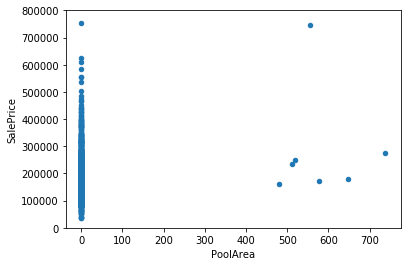

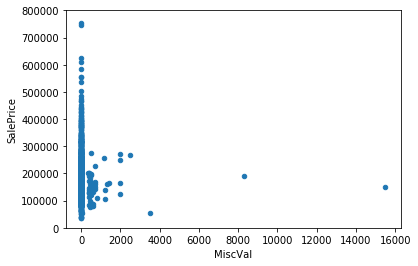

In [27]:
# lets explore relationships with target and all numerical features

for feature in num_features:
    data = pd.concat([target, features[feature].iloc[0:train_size]], axis=1)
    data.plot.scatter(x=feature, y='SalePrice', ylim=(0,800000))
    

Clear relationships:
    - LotFrontage
    - LotArea
    - MasVnrArea
    - BsmtFinSF1
    - BsmtFinSF2
    - BsmtUnfSF
    - 2ndFlrSF
    - GarageYrBlt
    - GarageArea
    
Linear relationships:
    - YearBuilt
    - YearRemodAdd
    - TotalBsmtSF
    - 1stFlrSF
    - GrLivArea
    
Intuitavely, we also know that some of these features are co-related.  Such as, its a valid assumption that the 1stFlrSF would be porportional to the TotalBsmtSF because of how homes are typically built with a foundation.  Another example is GarageArea and GarageCars.  The greater the GarageArea, the greater the GarageCars we will have.


We should encode the following variables with embeddings to capture similarity:

    - YearBuilt
    - YearRemodAdd
    - GarageYrBlt
    
There are packages available in PyTorch or FastAI that can accomplish this for us.  For now, we will leave these as continous varaibles and explore the embeddings at a later time.
    

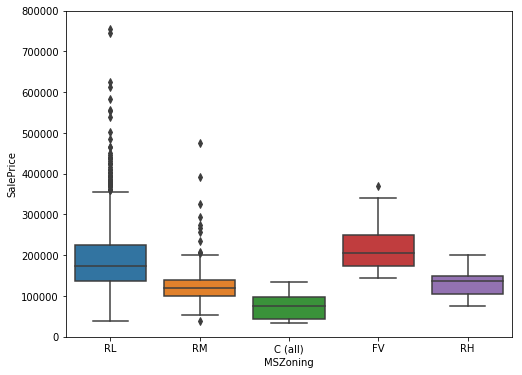

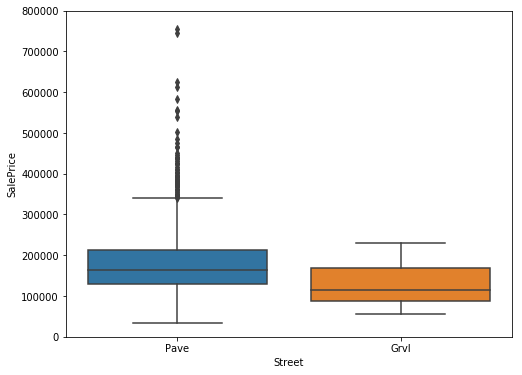

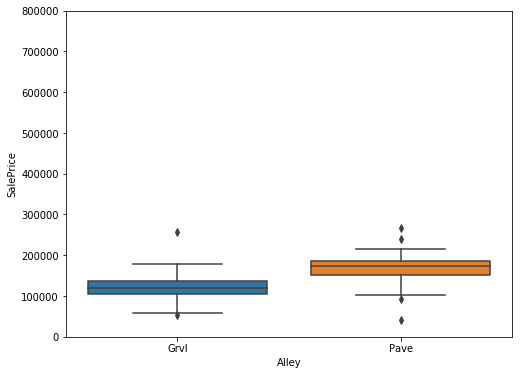

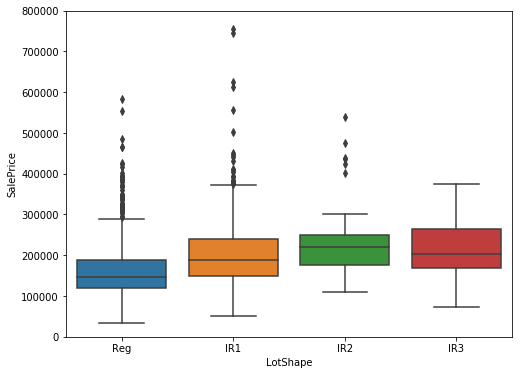

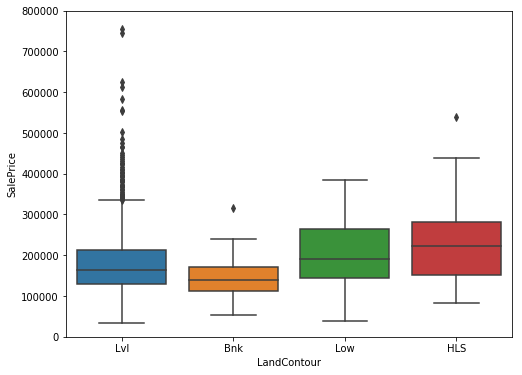

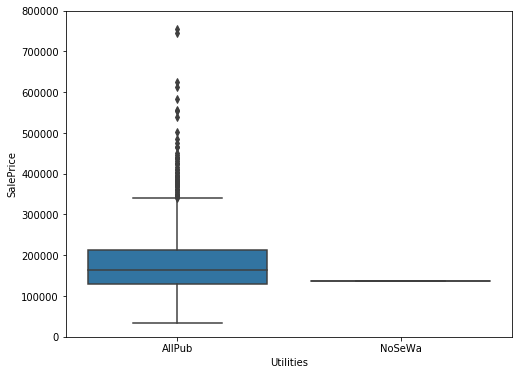

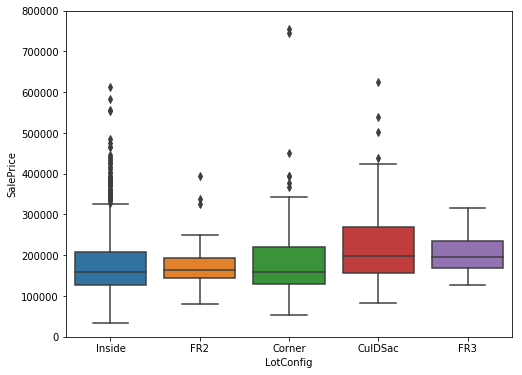

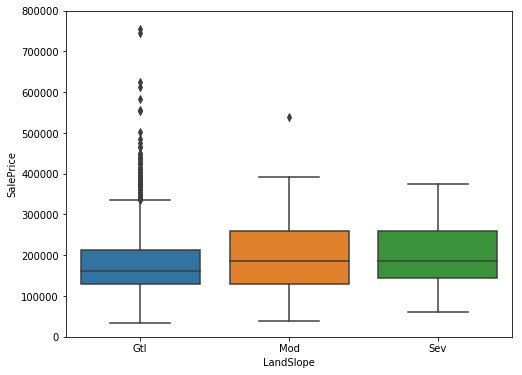

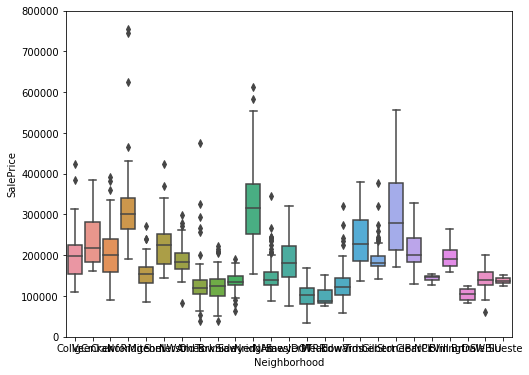

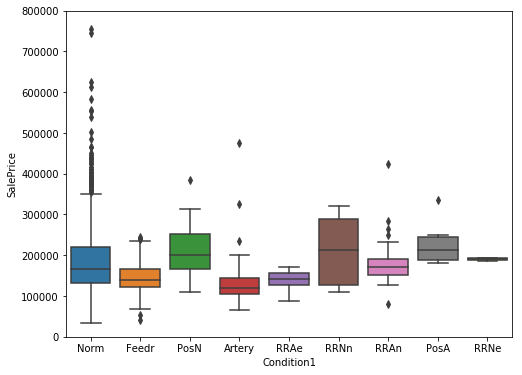

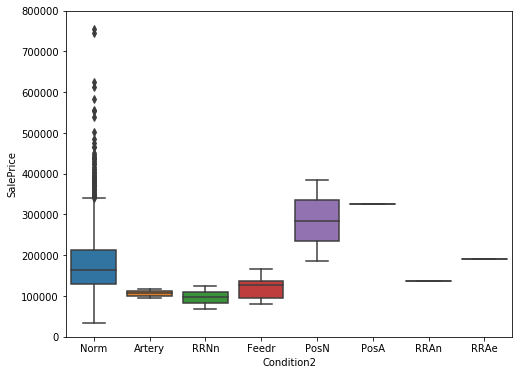

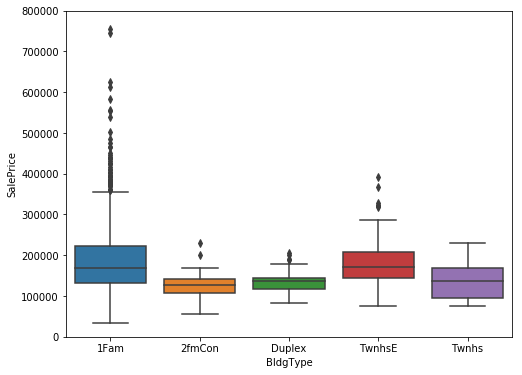

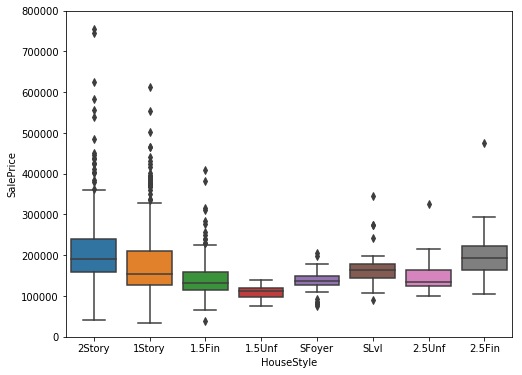

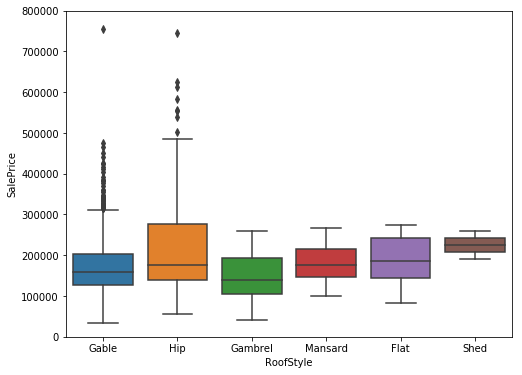

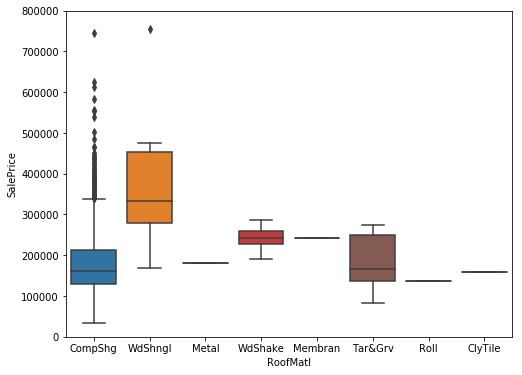

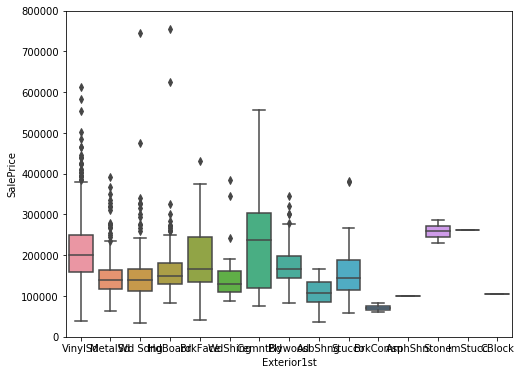

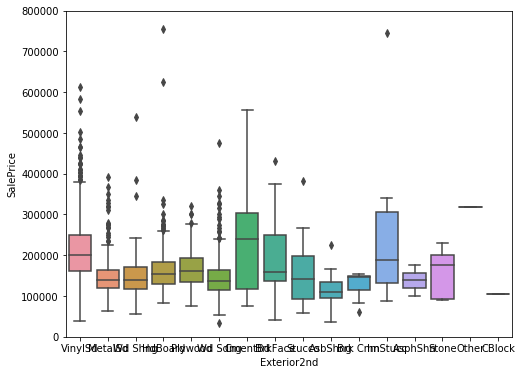

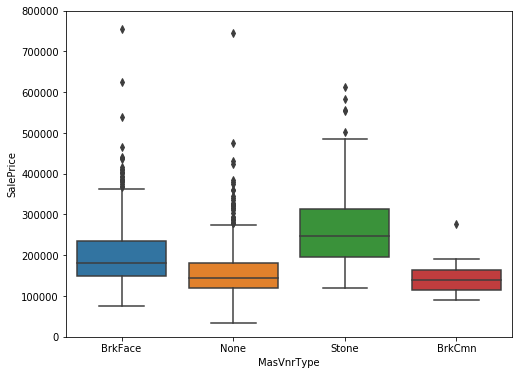

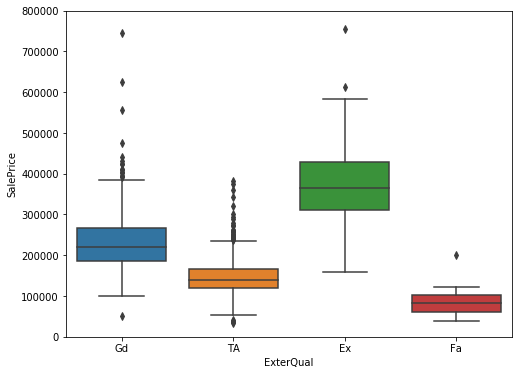

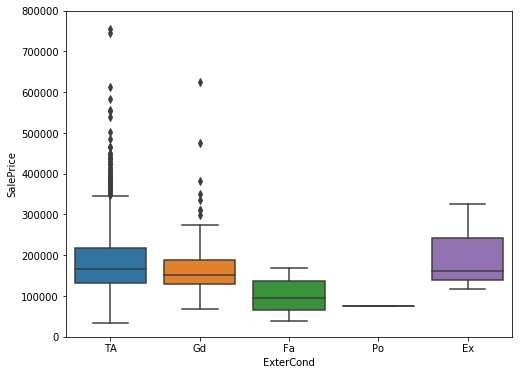

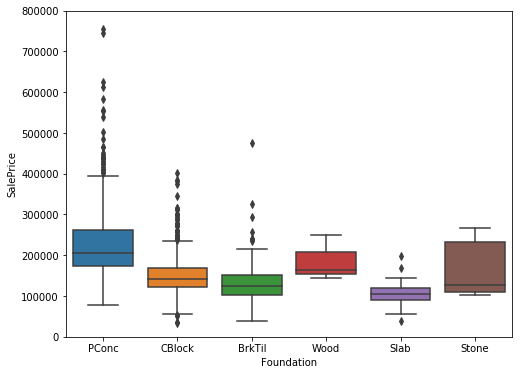

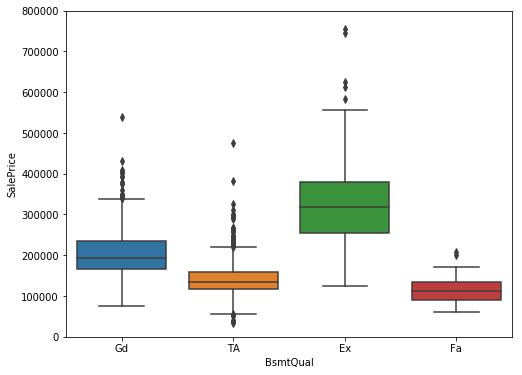

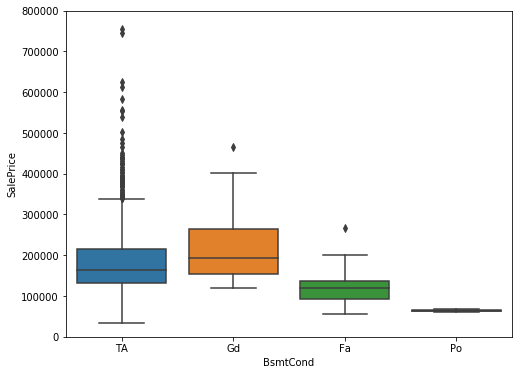

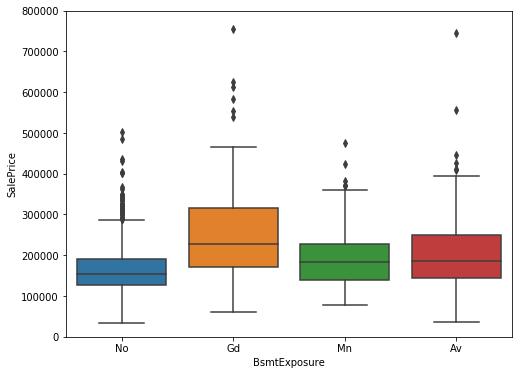

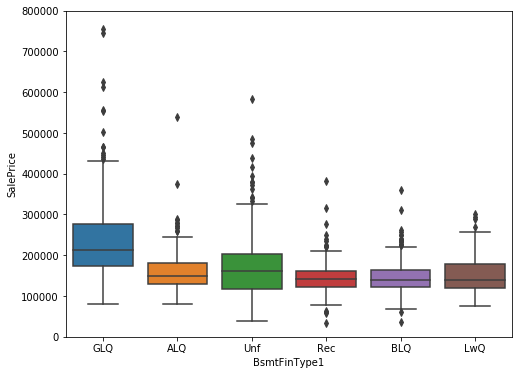

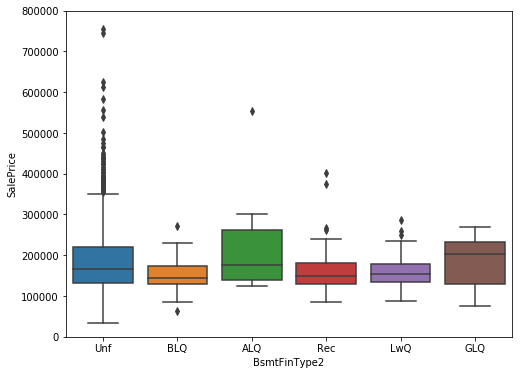

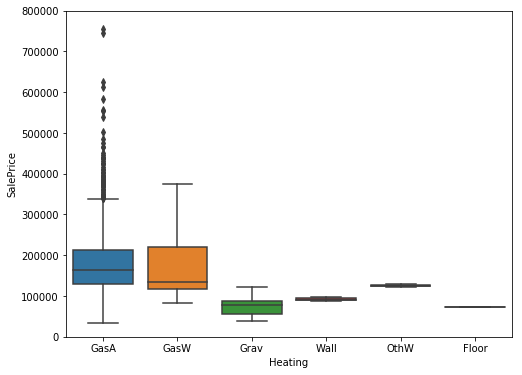

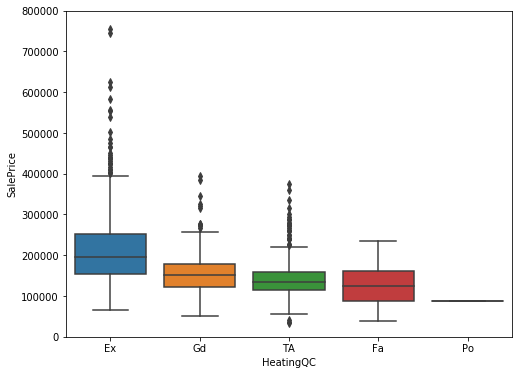

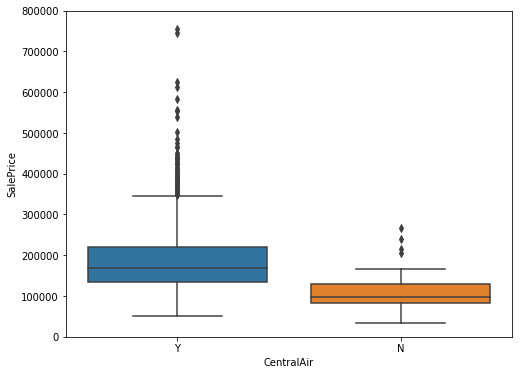

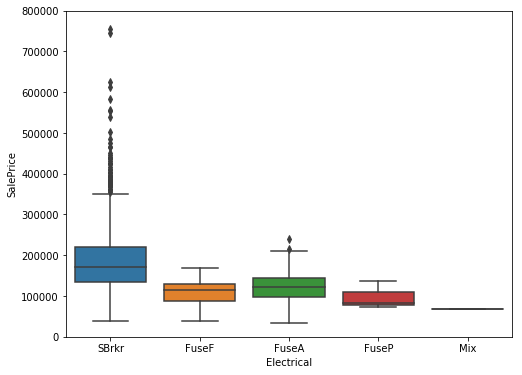

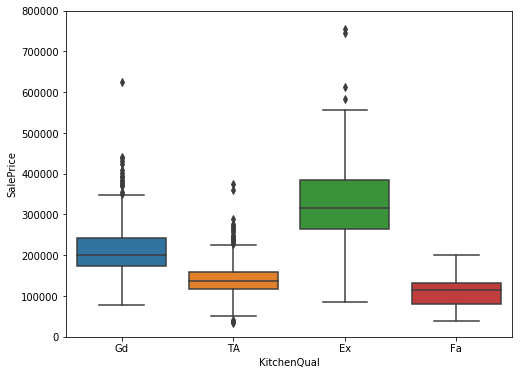

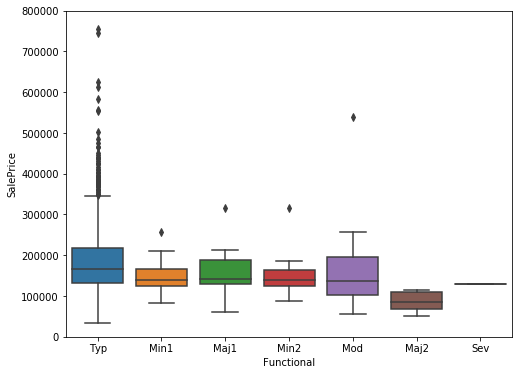

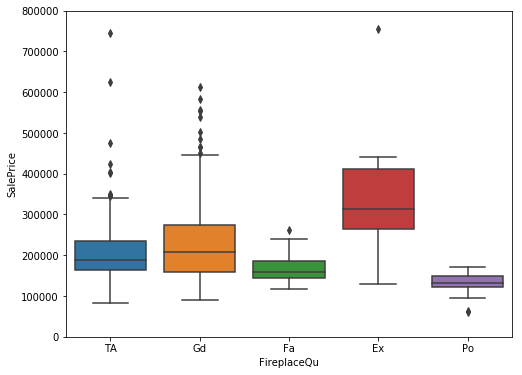

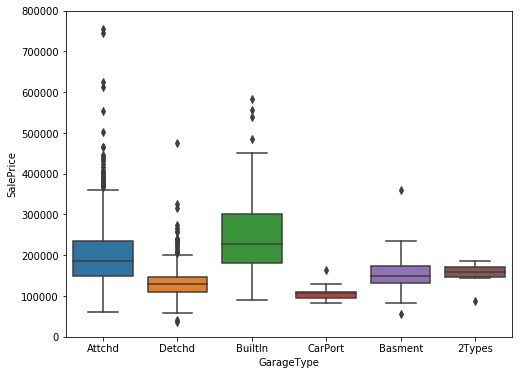

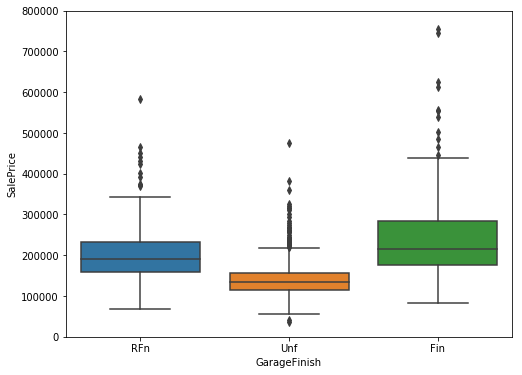

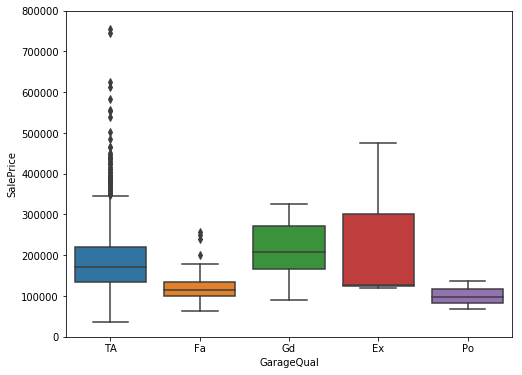

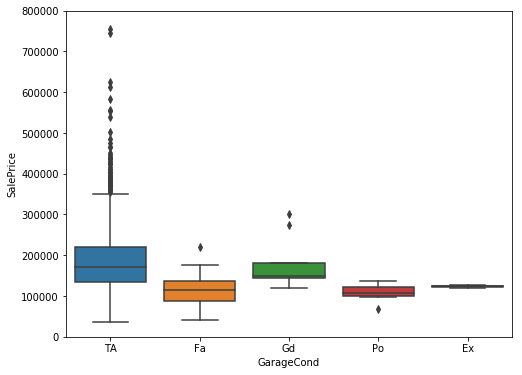

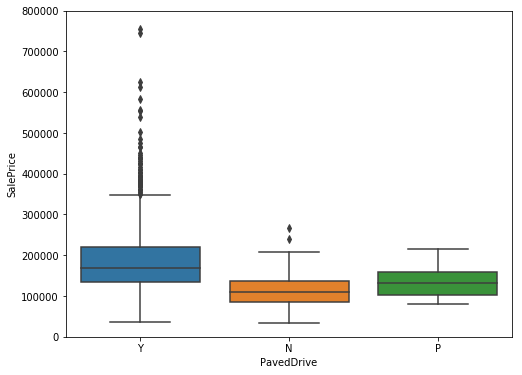

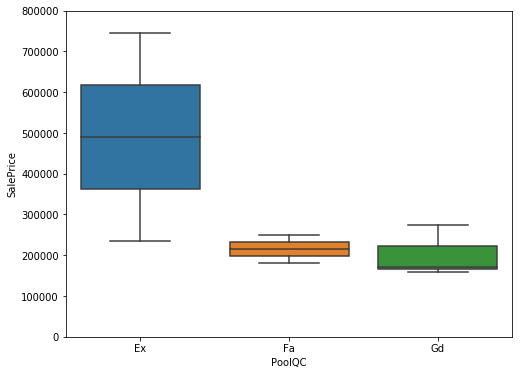

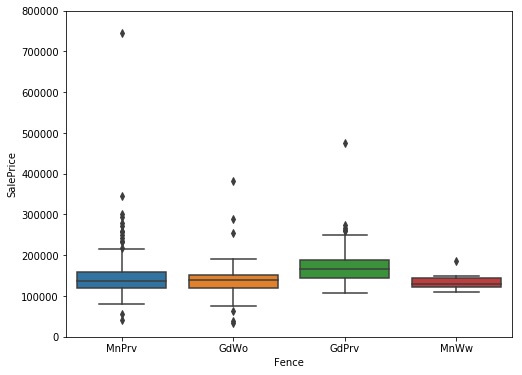

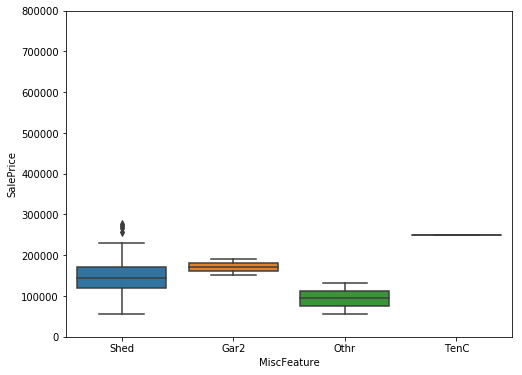

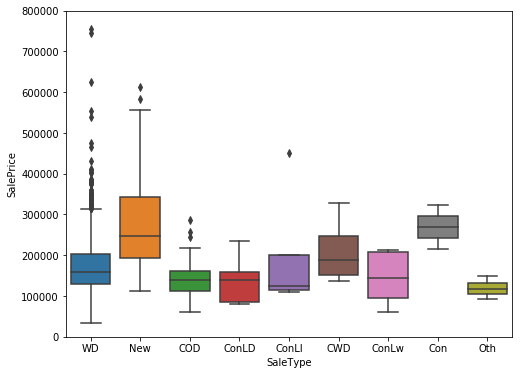

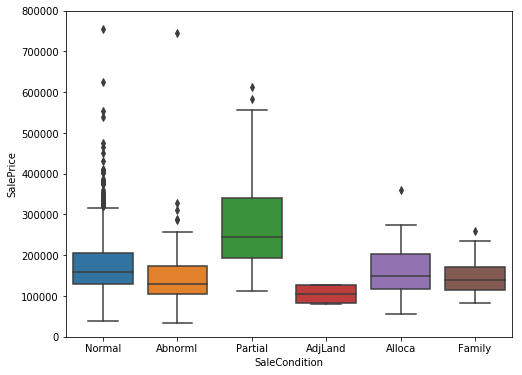

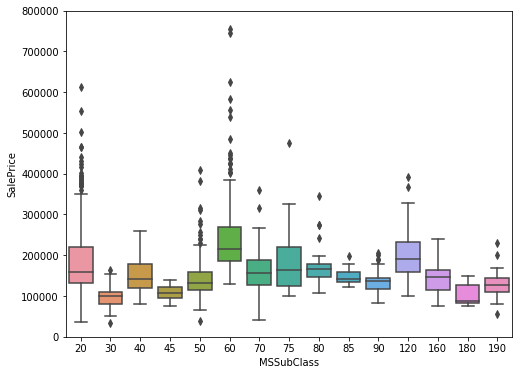

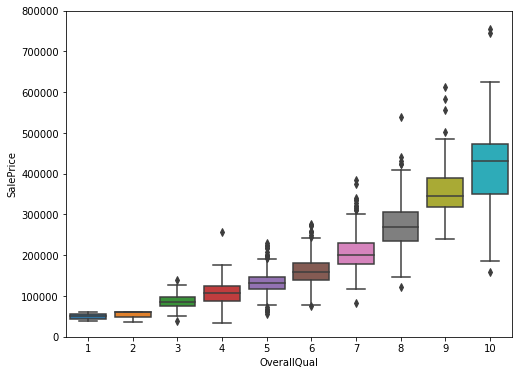

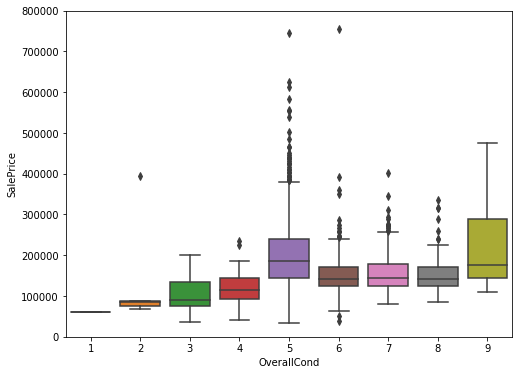

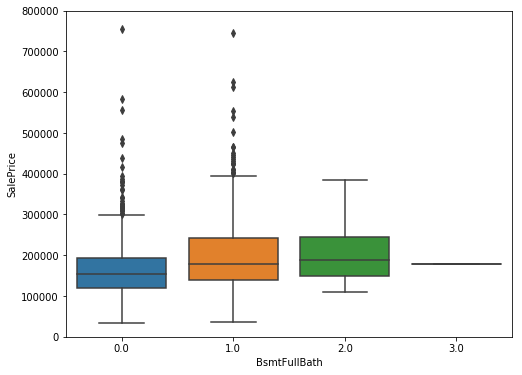

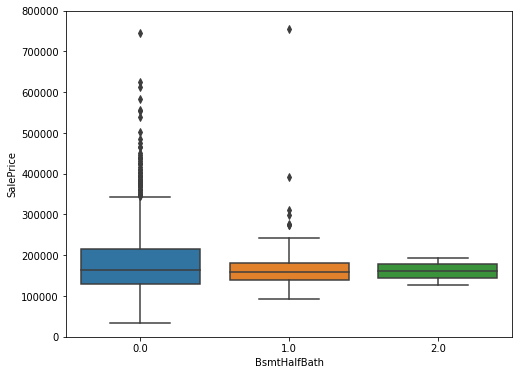

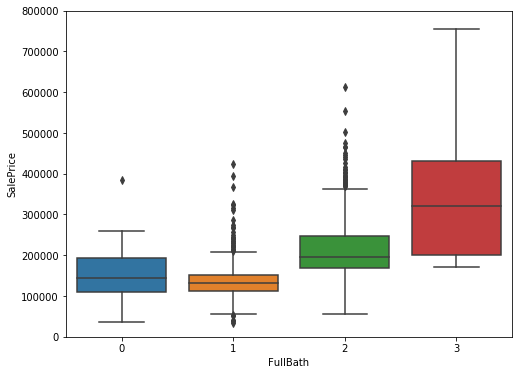

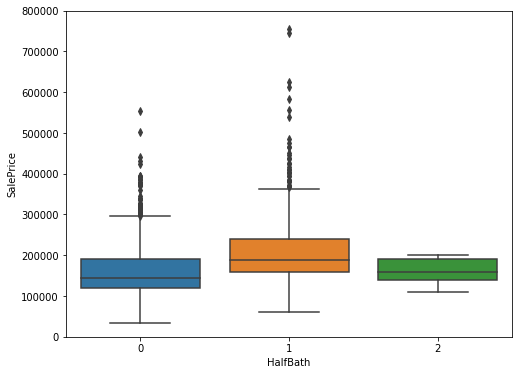

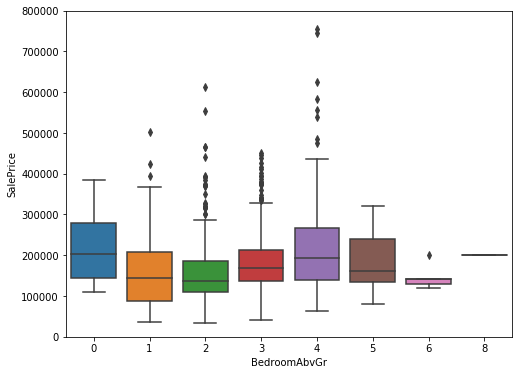

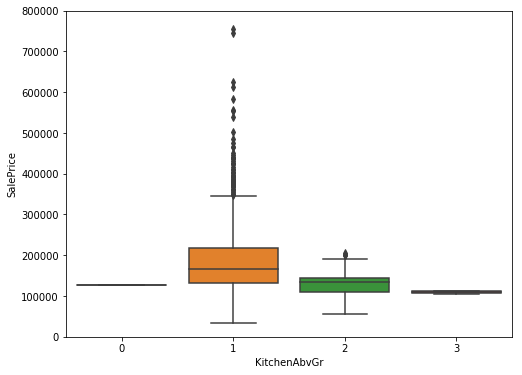

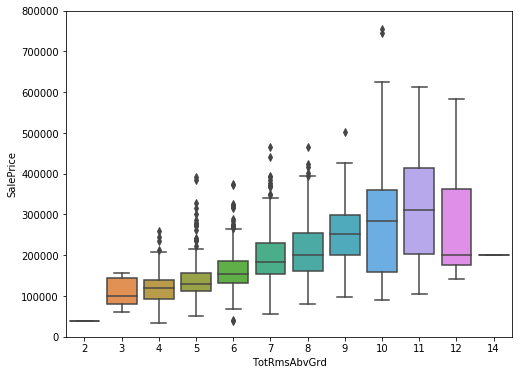

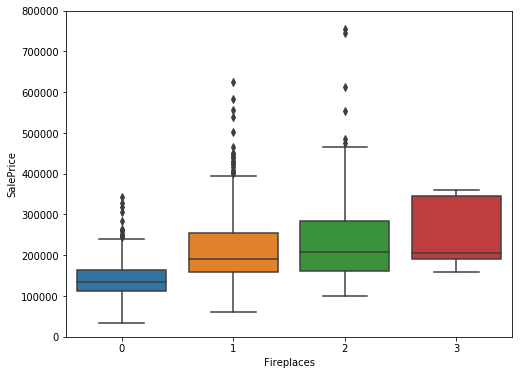

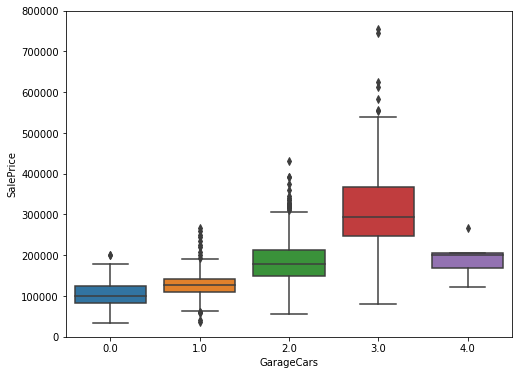

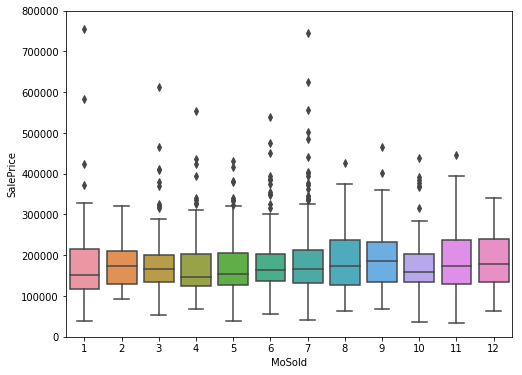

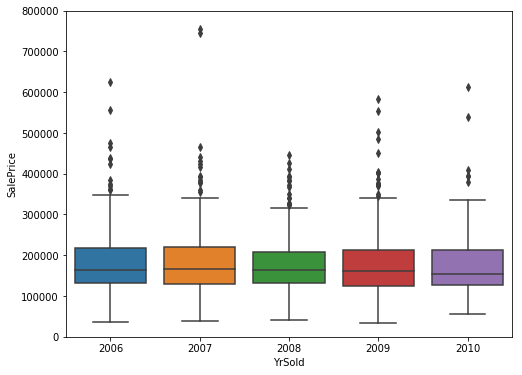

In [28]:
#box plot overallqual/saleprice

for feature in cat_features:
    data = pd.concat([target, features[feature].iloc[0:train_size]], axis=1)
    f, ax = plt.subplots(figsize=(8, 6))
    fig = sns.boxplot(x=feature, y="SalePrice", data=data)
    fig.axis(ymin=0, ymax=800000);

In our categorical variables we observe that the catogories effectively set bounds on our 'SalePrice' with categories such as:

    - MSZoning
    - Street
    - Alley
    - LotSHape
    - Neighborhood
    
    
We also see clear relationships with the target variable for the following variables:

    - OverallQual
    - OverallCond
    - TotRmsAbvGrd

### Lets look at correlations quantitatively

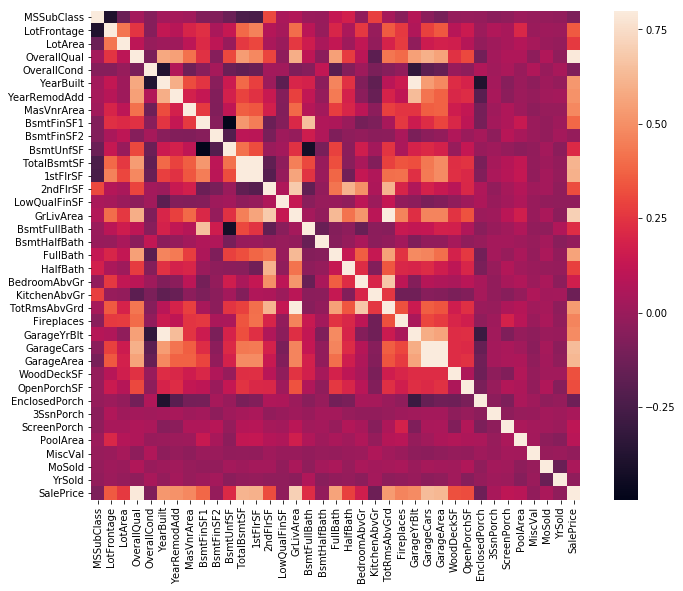

In [29]:
#correlation matrix of feature
frames = (features.iloc[0:train_size], target)
frame = pd.concat(frames, axis = 1)
corr = frame.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, vmax=.8, square=True);

Visually, we can see that lighter coloured cells are highly correlated.  

Some clear correlations with our target variable:

    - OverallQual
    - GrLivArea
    - GarageCars
    - GarageArea
    - TotalBsmtSF
    - 1stFlSF

We also see correlations within our features:

    - GarageYrBuilt, YearBlt (intuitively we know that garages are usually built at the same time the home is built)
    - TotRmsAbvGrd, GrLivArea (more rooms = more living area)

In [30]:
corr2 = corr.unstack().sort_values(ascending=False).abs()
corr3 = corr2[corr2 != 1].reset_index()
corr3.sort_values(by=0,ascending=False)

corr_absdes = corr3.loc[corr3['level_0'] == 'SalePrice']

corr_absdes.head(15)

level_0       level_1         0
8    SalePrice   OverallQual  0.790982
10   SalePrice     GrLivArea  0.708624
21   SalePrice    GarageCars  0.640409
24   SalePrice    GarageArea  0.623431
29   SalePrice   TotalBsmtSF  0.613581
32   SalePrice      1stFlrSF  0.605852
51   SalePrice      FullBath  0.560664
64   SalePrice  TotRmsAbvGrd  0.533723
66   SalePrice     YearBuilt  0.522897
73   SalePrice  YearRemodAdd  0.507101
80   SalePrice   GarageYrBlt  0.486362
87   SalePrice    MasVnrArea  0.477493
99   SalePrice    Fireplaces  0.466929
145  SalePrice    BsmtFinSF1  0.386420
162  SalePrice   LotFrontage  0.351799

In [31]:
corr_features = list(corr_absdes[corr_absdes[0]>0.51]['level_1'].values)

The highest correlated features to 'SalePrice' (we use abs value) are:

    - OverallQual
    - GrLivArea
    - GarageCars
    - GarageArea
    - TotalBsmtSF
    - 1stFlrSF
    - TotRmsAbvGrd
    - YearBuilt

In [32]:
corr_features

['OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt']

In [33]:
corr3.head(40)

level_0       level_1         0
0     GarageCars    GarageArea  0.882475
1     GarageArea    GarageCars  0.882475
2      YearBuilt   GarageYrBlt  0.825667
3    GarageYrBlt     YearBuilt  0.825667
4   TotRmsAbvGrd     GrLivArea  0.825489
5      GrLivArea  TotRmsAbvGrd  0.825489
6    TotalBsmtSF      1stFlrSF  0.819530
7       1stFlrSF   TotalBsmtSF  0.819530
8      SalePrice   OverallQual  0.790982
9    OverallQual     SalePrice  0.790982
10     SalePrice     GrLivArea  0.708624
11     GrLivArea     SalePrice  0.708624
12      2ndFlrSF     GrLivArea  0.687501
13     GrLivArea      2ndFlrSF  0.687501
14  BedroomAbvGr  TotRmsAbvGrd  0.676620
15  TotRmsAbvGrd  BedroomAbvGr  0.676620
16  BsmtFullBath    BsmtFinSF1  0.649212
17    BsmtFinSF1  BsmtFullBath  0.649212
18   GarageYrBlt  YearRemodAdd  0.642277
19  YearRemodAdd   GarageYrBlt  0.642277
20    GarageCars     SalePrice  0.640409
21     SalePrice    GarageCars  0.640409
22      FullBath     GrLivArea  0.630012
23     GrLivArea      FullBath  0.630012
24     SalePrice    GarageArea  0.623431
25    GarageArea     SalePrice  0.623431
26  TotRmsAbvGrd      2ndFlrSF  0.616423
27      2ndFlrSF  TotRmsAbvGrd  0.616423
28   TotalBsmtSF     SalePrice  0.613581
29     SalePrice   TotalBsmtSF  0.613581
30      2ndFlrSF      HalfBath  0.609707
31      HalfBath      2ndFlrSF  0.609707
32     SalePrice      1stFlrSF  0.605852
33      1stFlrSF     SalePrice  0.605852
34   OverallQual    GarageCars  0.600671
35    GarageCars   OverallQual  0.600671
36   OverallQual     GrLivArea  0.593007
37     GrLivArea   OverallQual  0.593007
38  YearRemodAdd     YearBuilt  0.592855
39     YearBuilt  YearRemodAdd  0.592855

We see that many of our features are correlated with each other, as we saw earlier.  We can explore ways of handling correlated features after our baseline model is completed.

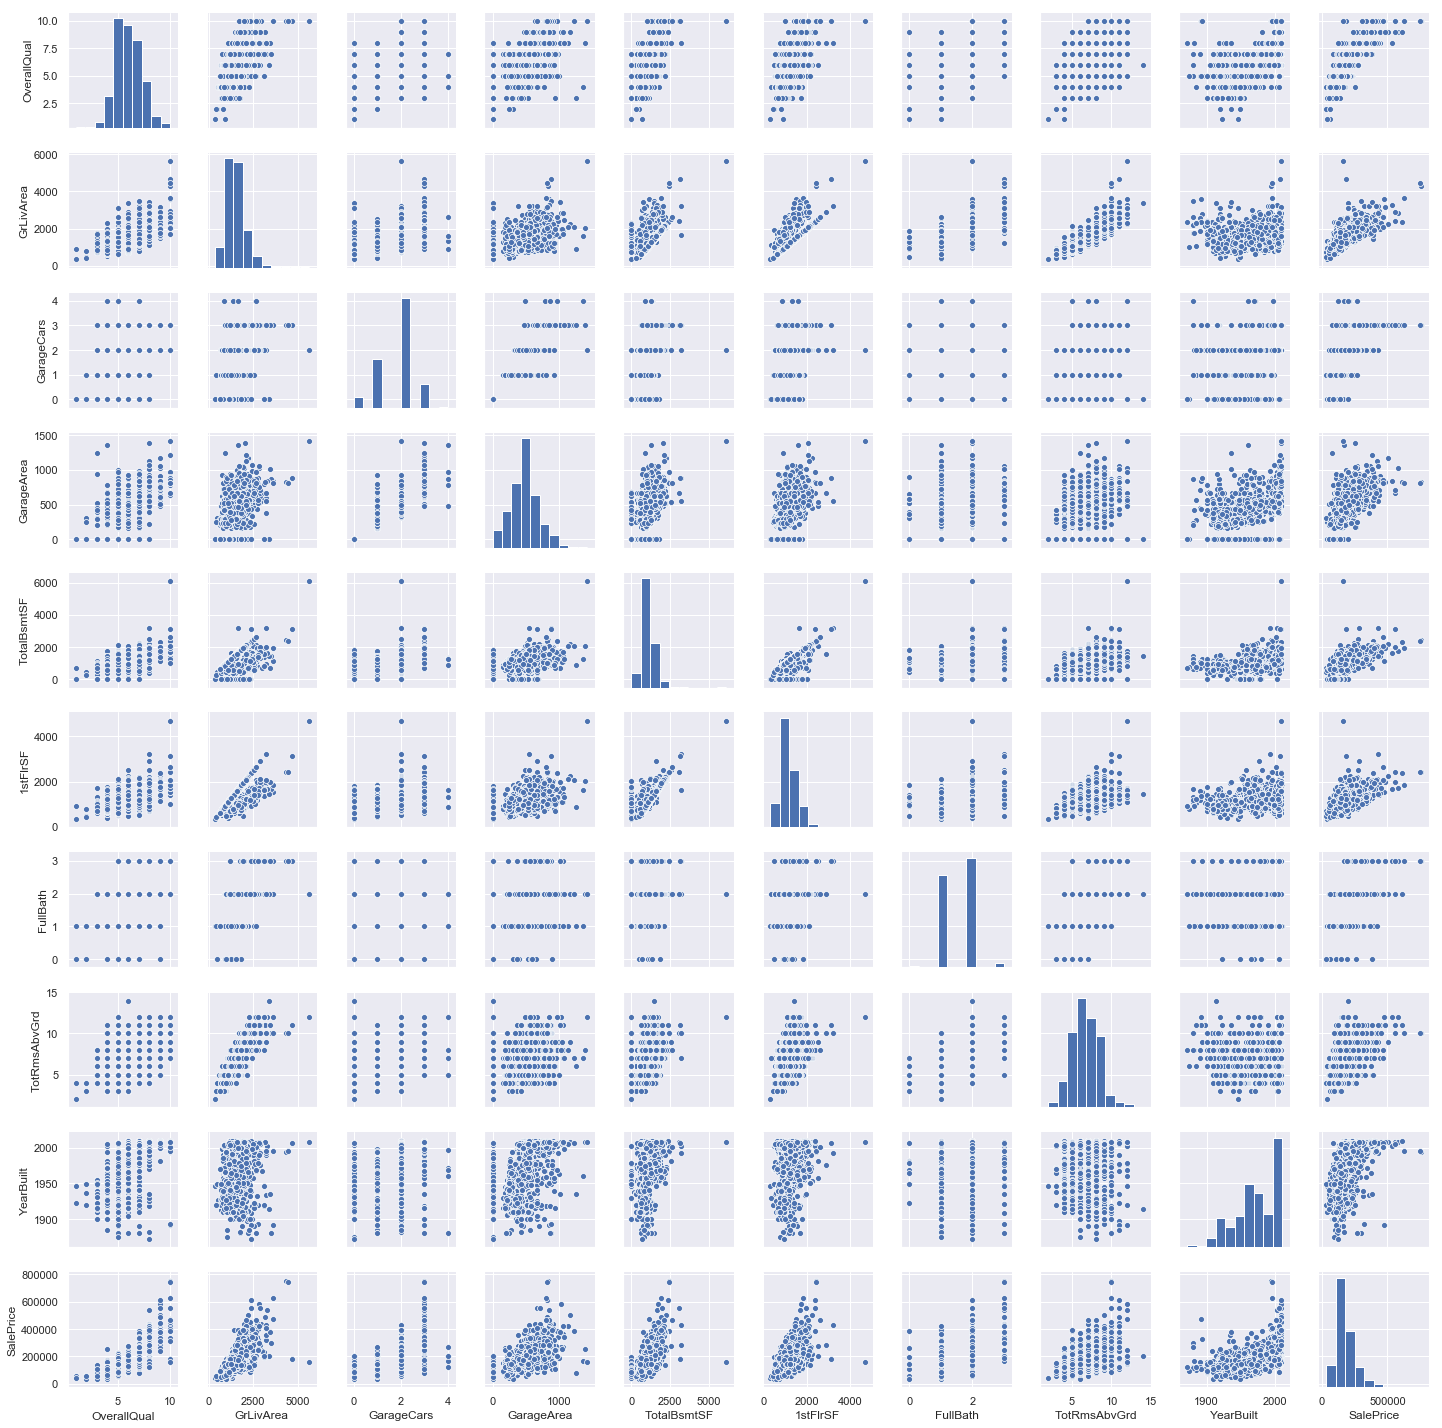

In [34]:
#scatterplot

cols = corr_features
cols.append('SalePrice')
sns.set()
sns.pairplot(frame[cols], size = 2)
plt.show();

# Data Cleaning

In [35]:
#missing data

total = features.isnull().sum().sort_values(ascending=False)
percent = (features.isnull().sum()/features.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data[missing_data['Total']>0]

Total   Percent
PoolQC         2909  0.996574
MiscFeature    2814  0.964029
Alley          2721  0.932169
Fence          2348  0.804385
FireplaceQu    1420  0.486468
LotFrontage     486  0.166495
GarageCond      159  0.054471
GarageQual      159  0.054471
GarageYrBlt     159  0.054471
GarageFinish    159  0.054471
GarageType      157  0.053786
BsmtCond         82  0.028092
BsmtExposure     82  0.028092
BsmtQual         81  0.027749
BsmtFinType2     80  0.027407
BsmtFinType1     79  0.027064
MasVnrType       24  0.008222
MasVnrArea       23  0.007879
MSZoning          4  0.001370
BsmtHalfBath      2  0.000685
Utilities         2  0.000685
Functional        2  0.000685
BsmtFullBath      2  0.000685
BsmtFinSF2        1  0.000343
BsmtFinSF1        1  0.000343
Exterior2nd       1  0.000343
BsmtUnfSF         1  0.000343
TotalBsmtSF       1  0.000343
Exterior1st       1  0.000343
SaleType          1  0.000343
Electrical        1  0.000343
KitchenQual       1  0.000343
GarageArea        1  0.000343
GarageCars        1  0.000343

For categorical variables we can eliminate the null values when we encode the values, therefore we will provide no manipulation here.

The following continious variables will need to be addressed:

    - LotFrontage -> which is correlated to LotArea
    - GarageYrBlt -> which is correlated to YearBuilt, we can fill these with the YearBuilt
    - MasVnrArea -> we will assume that the null values can be 0, as most values are 0
    - BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, GarageArea -> set to 0

In [36]:
# settings nulls to zero

features_nonull = features.copy()

columns = ['MasVnrArea','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'GarageArea']

for col in columns:
    features_nonull[col][features_nonull[col].isnull()] = 0


In [37]:
# filling nulls

features_nonull['GarageYrBlt'][features_nonull['GarageYrBlt'].isnull()] = features_nonull['YearBuilt']

In [38]:
total = features_nonull.isnull().sum().sort_values(ascending=False)
percent = (features_nonull.isnull().sum()/features_nonull.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data[missing_data['Total']>0]

Total   Percent
PoolQC         2909  0.996574
MiscFeature    2814  0.964029
Alley          2721  0.932169
Fence          2348  0.804385
FireplaceQu    1420  0.486468
LotFrontage     486  0.166495
GarageFinish    159  0.054471
GarageQual      159  0.054471
GarageCond      159  0.054471
GarageType      157  0.053786
BsmtExposure     82  0.028092
BsmtCond         82  0.028092
BsmtQual         81  0.027749
BsmtFinType2     80  0.027407
BsmtFinType1     79  0.027064
MasVnrType       24  0.008222
MSZoning          4  0.001370
BsmtFullBath      2  0.000685
BsmtHalfBath      2  0.000685
Functional        2  0.000685
Utilities         2  0.000685
Exterior1st       1  0.000343
KitchenQual       1  0.000343
SaleType          1  0.000343
Exterior2nd       1  0.000343
GarageCars        1  0.000343
Electrical        1  0.000343

In [39]:
#lets see if the single null that occurs in Exterior1st, KitchenQual, etc all occur in the same row
features_nonull[features_nonull['Electrical'].isnull()]

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1379          80       RL         73.0     9735   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1379         Lvl    AllPub    Inside       Gtl       Timber       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1379       Norm     1Fam       SLvl            5            5       2006   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1379          2007     Gable  CompShg     VinylSd     VinylSd       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1379         0.0        TA        TA      PConc       Gd       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1379           No          Unf         0.0          Unf         0.0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1379      384.0        384.0    GasA        Gd          Y        NaN   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1379       754       640             0       1394           0.0           0.0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1379         2         1             3             1          Gd   

      TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt  \
1379             7        Typ           0         NaN    BuiltIn       2007.0   

     GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
1379          Fin         2.0       400.0         TA         TA          Y   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
1379         100            0              0          0            0   

      PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType  \
1379         0    NaN   NaN         NaN        0       5    2008       WD   

     SaleCondition  
1379        Normal

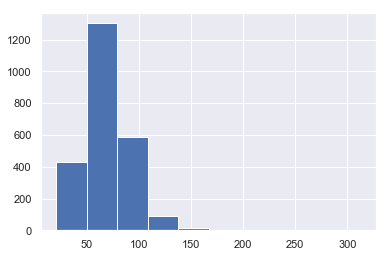

In [40]:
features_nonull['LotFrontage'].hist();

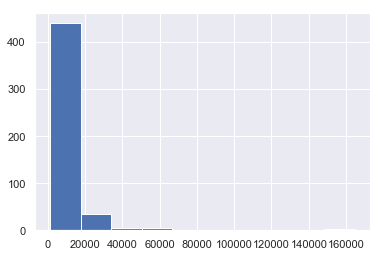

In [41]:
indexes = np.isnan(features_nonull['LotFrontage'])

features_nonull['LotArea'][indexes].hist();

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


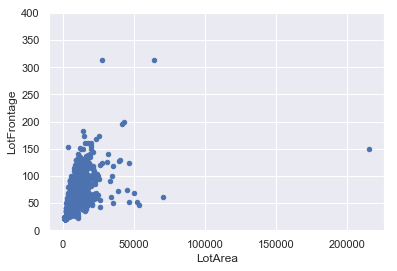

In [42]:
data = pd.concat([features_nonull['LotFrontage'], features_nonull['LotArea']], axis=1)
data.plot.scatter(x='LotArea', y='LotFrontage', ylim=(0,400))

The missing LotFrontage data can be filled with the mode of LotFrontage.  There is a relationship between LotArea and LotFrontage, to be more accurate we could take the mode of LotFrontage for ranges of LotArea and use them to fill the missing LotFrontage data.

In [43]:
from statistics import mode

modeof = mode(features_nonull['LotFrontage'])

print (modeof)

60.0


In [44]:
tmp = features_nonull[(features_nonull['LotArea']<10000) & (features_nonull['LotArea']>0)]

mode1 = mode(tmp['LotFrontage'][tmp['LotFrontage'].notnull()])

tmp = features_nonull[(features_nonull['LotArea']<20000) & (features_nonull['LotArea']>9999)]

mode2 = mode(tmp['LotFrontage'][tmp['LotFrontage'].notnull()])

tmp = features_nonull[(features_nonull['LotArea']<60000) & (features_nonull['LotArea']>19999)]

mode3 = mode(tmp['LotFrontage'][tmp['LotFrontage'].notnull()])

tmp = features_nonull[features_nonull['LotArea']>59999]

mode4 = (tmp['LotFrontage'][tmp['LotFrontage'].notnull()]).mean()

print (mode1, mode2, mode3, mode4)

60.0 60.0 100.0 175.0


In [45]:
features_nonull['LotFrontage'][(features_nonull['LotFrontage'].isnull()) & (features_nonull['LotArea']<10000)] = mode1
features_nonull['LotFrontage'][(features_nonull['LotFrontage'].isnull()) & 
                               (features_nonull['LotArea']>9999) & (features_nonull['LotArea']<20000)] = mode2
features_nonull['LotFrontage'][(features_nonull['LotFrontage'].isnull()) & 
                               (features_nonull['LotArea']>19999) & (features_nonull['LotArea']<60000)] = mode3
features_nonull['LotFrontage'][(features_nonull['LotFrontage'].isnull()) & (features_nonull['LotArea']>59999)] = mode4

In [46]:
features_nonull['LotFrontage'].describe()

count    2919.000000
mean       68.313121
std        22.100492
min        21.000000
25%        60.000000
50%        64.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

### Now let us look at outliers

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

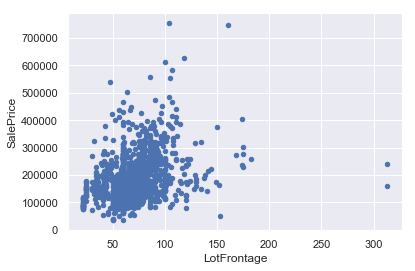

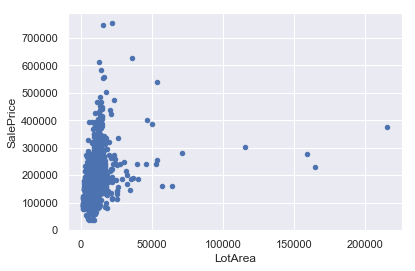

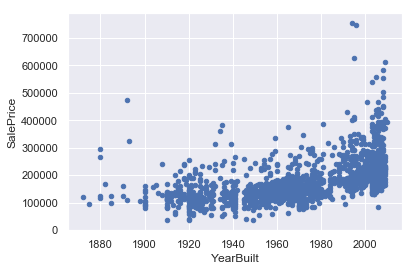

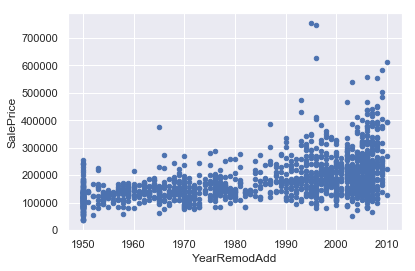

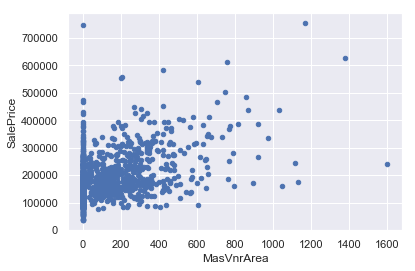

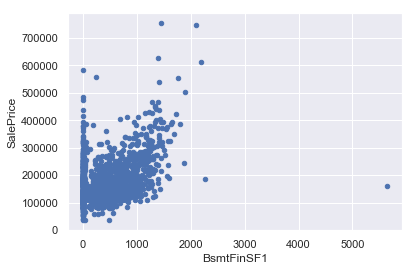

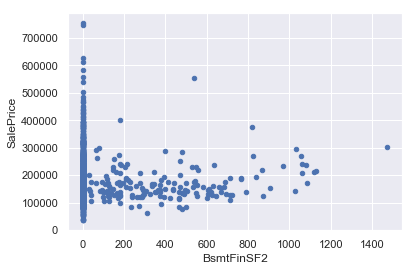

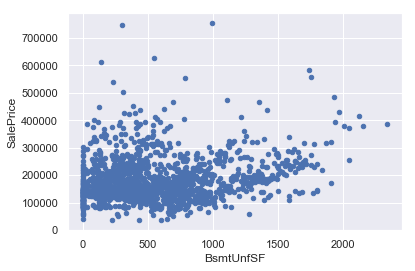

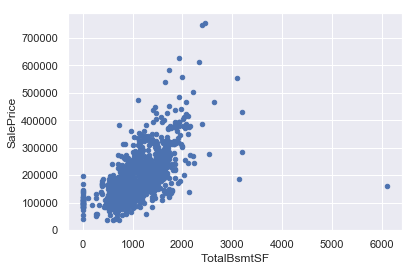

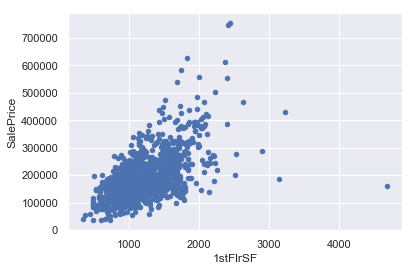

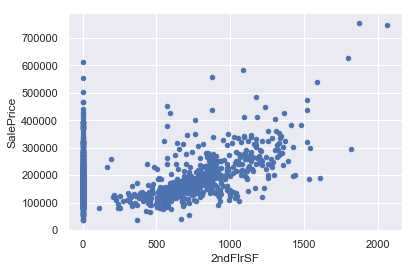

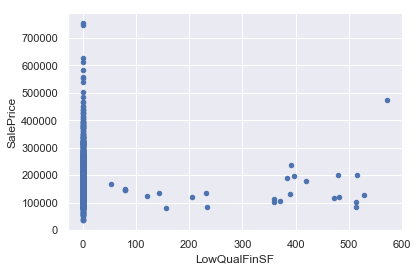

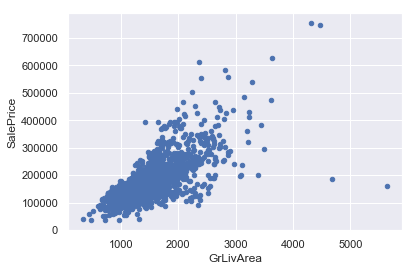

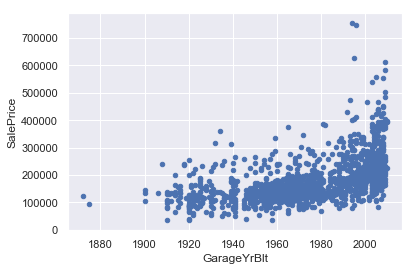

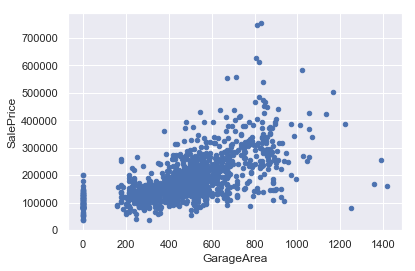

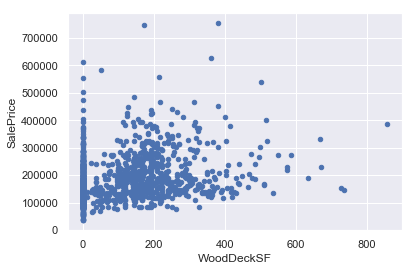

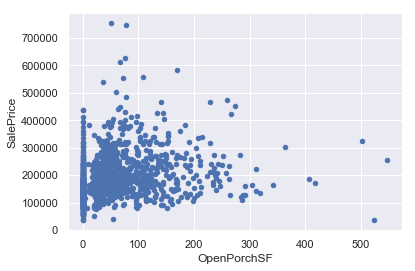

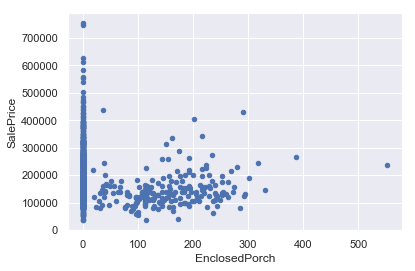

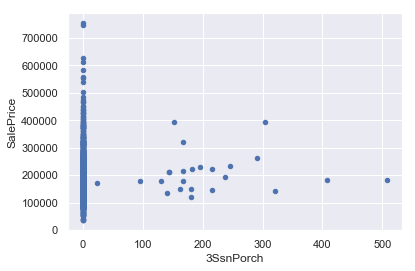

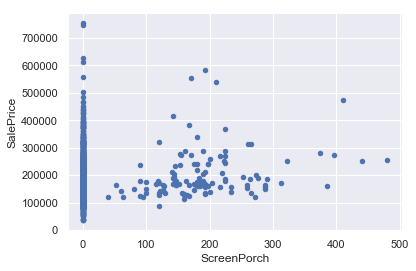

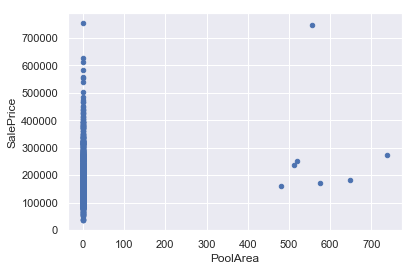

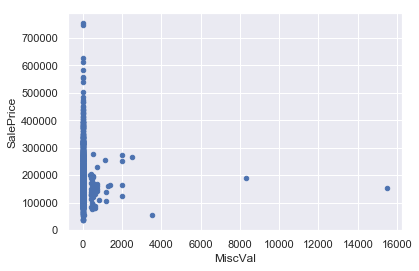

In [47]:
#we only want to look at the training data to remove outliers

for feature in num_features:
    data = pd.concat([features_nonull[feature].iloc[0:train_size], target], axis=1)
    data.plot.scatter(x=feature, y='SalePrice')

In [48]:
# we will visually remove outliers based on the charts above, for only the training data

features_noout = features_nonull.iloc[0:train_size]
target_noout = target.copy()

drop_rows = []

drop_rows.extend(features_noout[features_noout['LotFrontage']> 300].index)

drop_rows.extend(features_noout[features_noout['LotArea']> 100000].index)

drop_rows.extend(features_noout[features_noout['MasVnrArea']> 1200].index)

drop_rows.extend(features_noout[features_noout['BsmtFinSF1']> 3000].index)

drop_rows.extend(features_noout[features_noout['BsmtFinSF2']> 1200].index)

drop_rows.extend(features_noout[features_noout['TotalBsmtSF']> 6000].index)

drop_rows.extend(features_noout[features_noout['1stFlrSF']> 4000].index)

drop_rows.extend(features_noout[features_noout['2ndFlrSF']> 1700].index)

drop_rows.extend(features_noout[features_noout['LowQualFinSF']> 550].index)

drop_rows.extend(features_noout[features_noout['GrLivArea']> 4000].index)

drop_rows.extend(features_noout[features_noout['WoodDeckSF']> 800].index)

drop_rows.extend(features_noout[features_noout['OpenPorchSF']> 500].index)

drop_rows.extend(features_noout[features_noout['EnclosedPorch']> 500].index)

drop_rows.extend(target[target > 700000].index)

drop_rows = list(set(drop_rows))

train_size_noout = train_size - len(drop_rows)

print (train_size, train_size_noout)

1460 1441


In [49]:
features_noout.drop(index=drop_rows,axis=0, inplace=True)
target_noout.drop(index=drop_rows,axis=0, inplace=True)

print(features_noout.shape, target_noout.shape, train_size_noout)

(1441, 79) (1441,) 1441


In [50]:
frames = (features_noout, features_nonull.iloc[train_size:])

features_noout = pd.concat(frames, axis=0, ignore_index=True)

features_noout.shape

(2900, 79)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

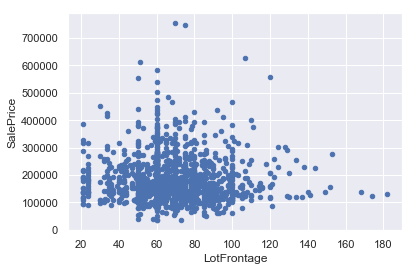

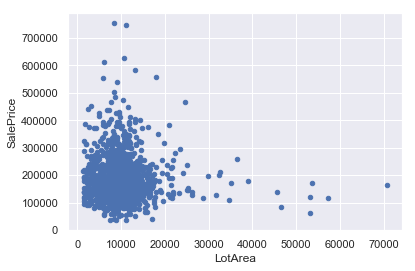

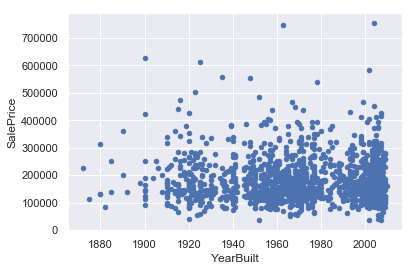

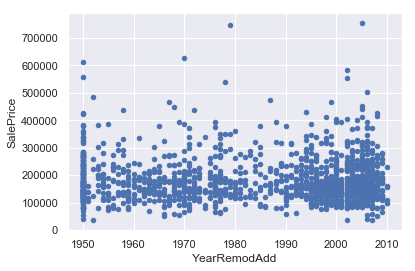

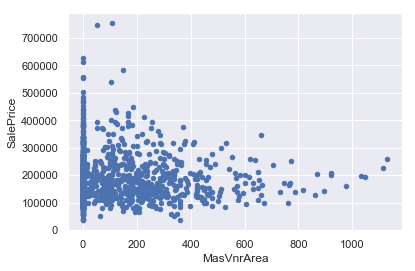

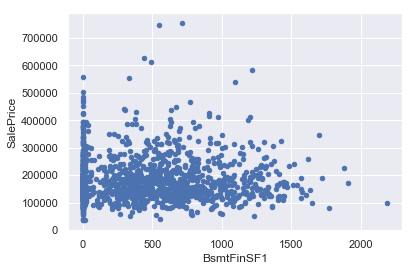

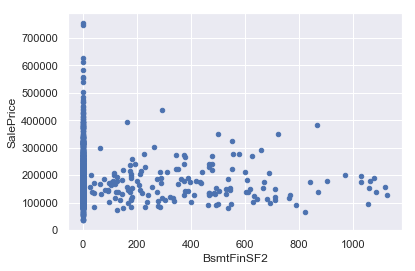

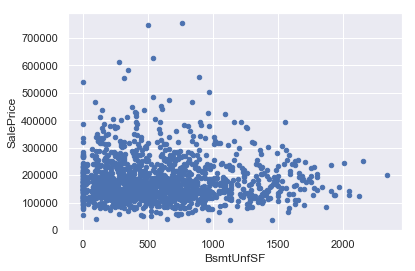

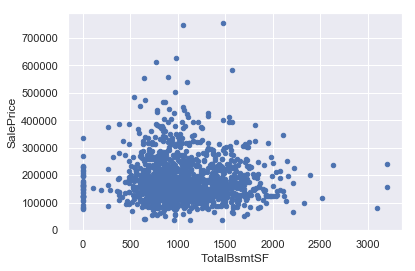

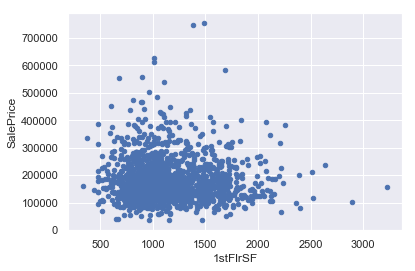

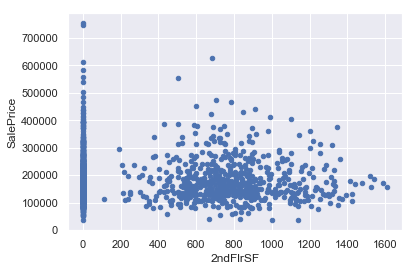

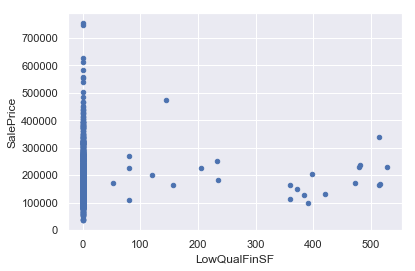

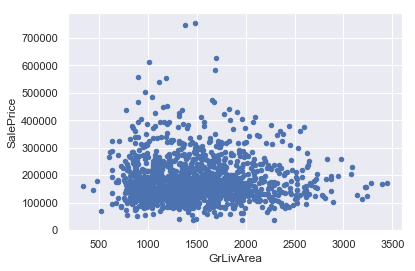

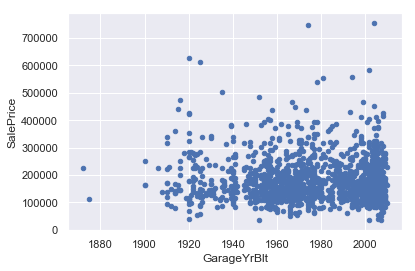

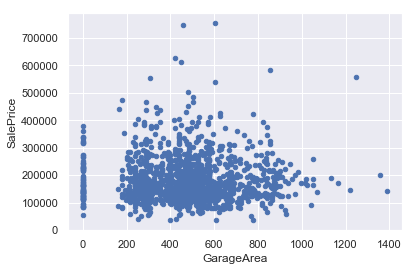

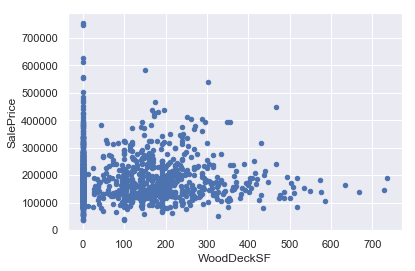

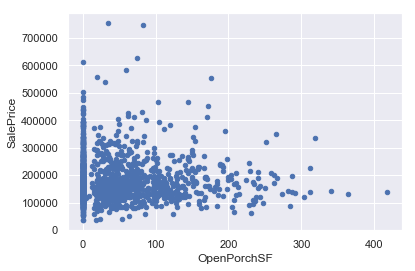

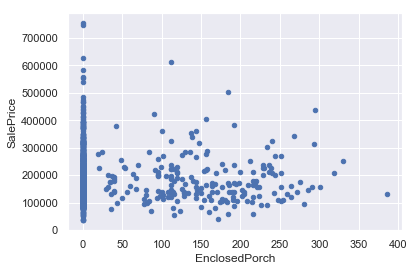

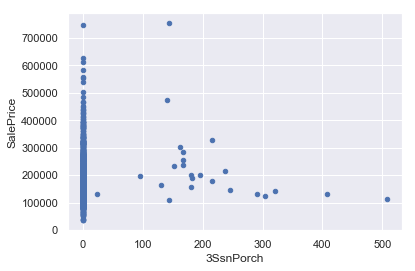

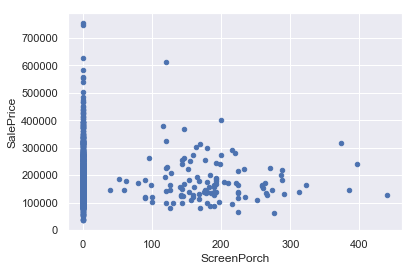

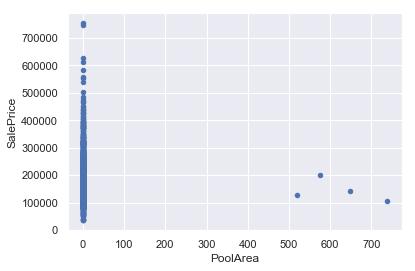

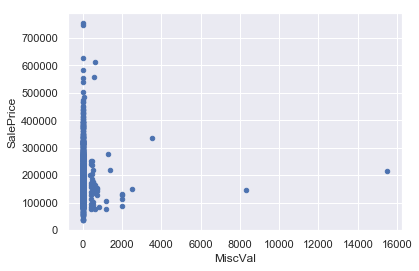

In [51]:
for feature in num_features:
    data = pd.concat([features_noout[feature].iloc[0:train_size_noout], target], axis=1)
    data.plot.scatter(x=feature, y='SalePrice')

### Now we will look at the skewness of our features

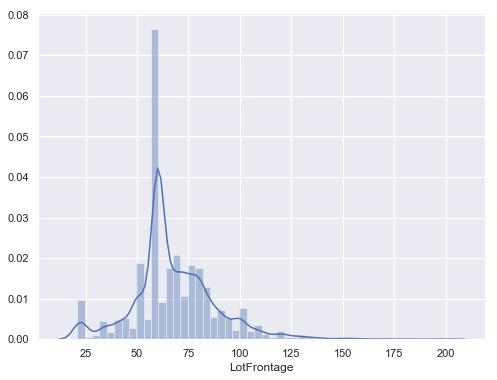

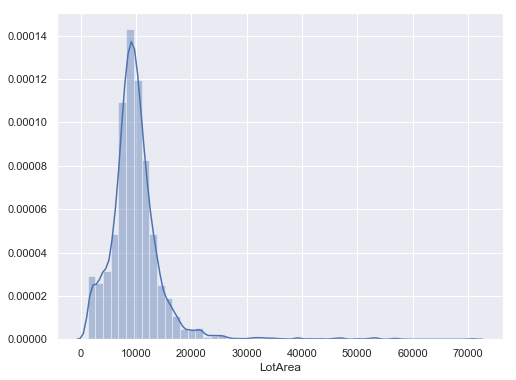

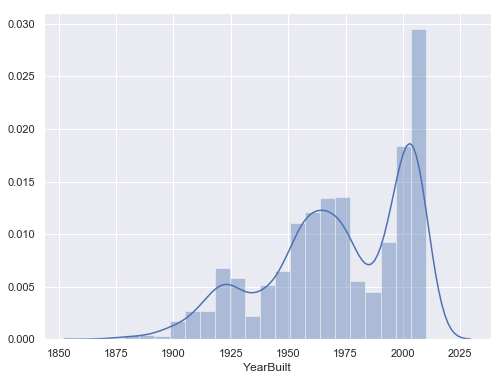

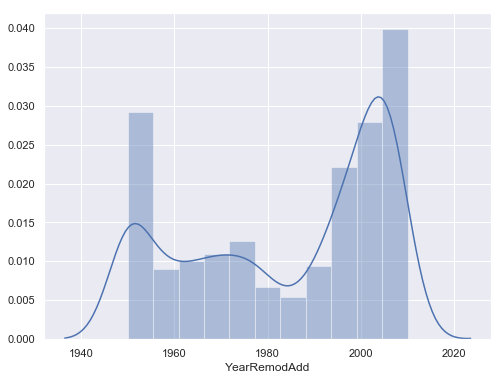

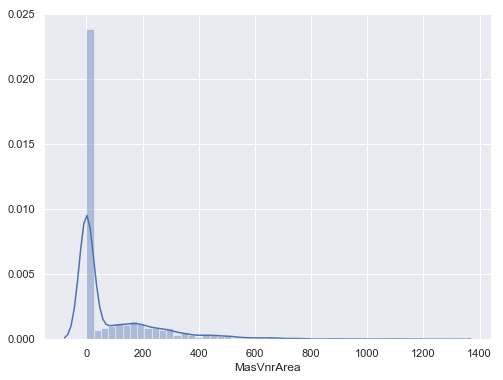

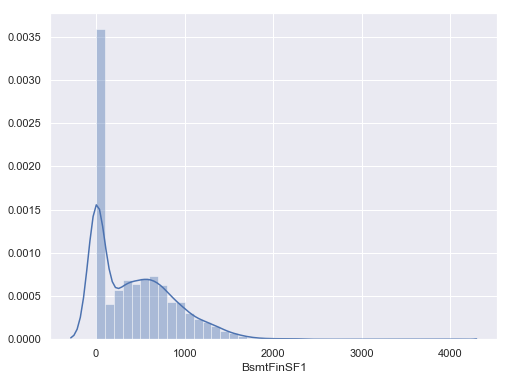

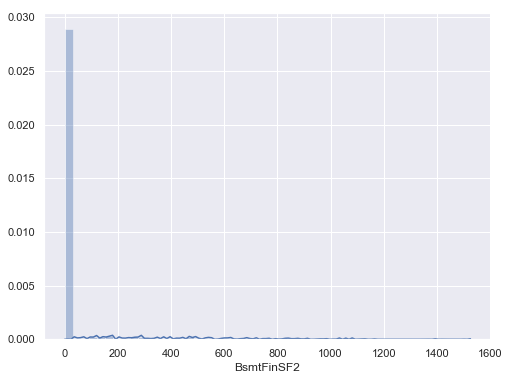

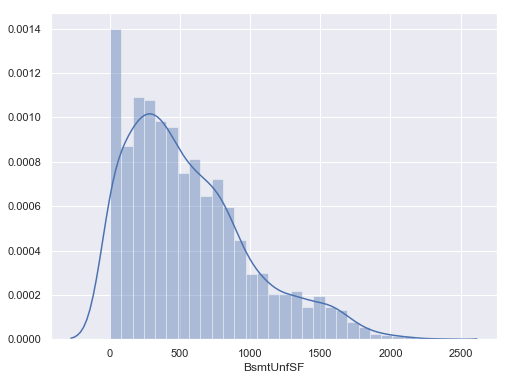

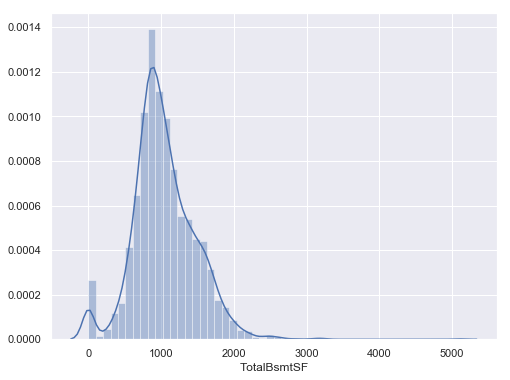

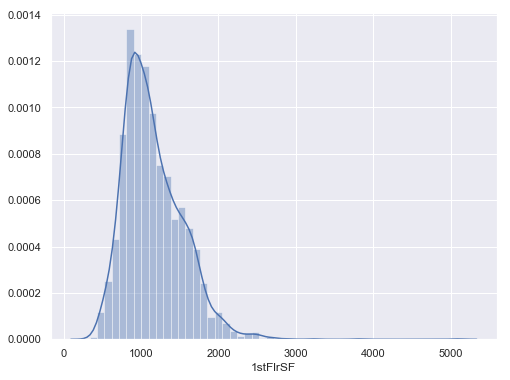

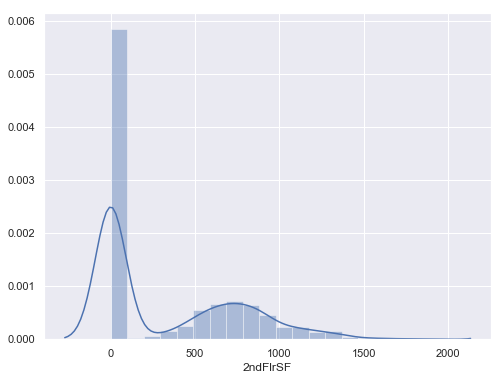

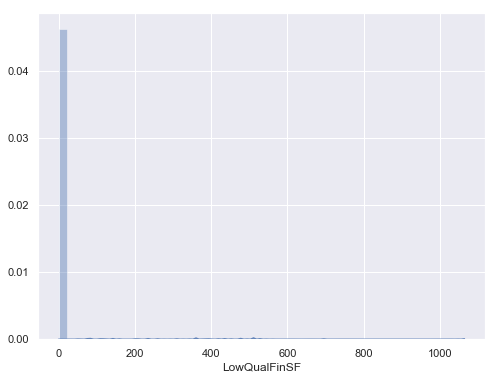

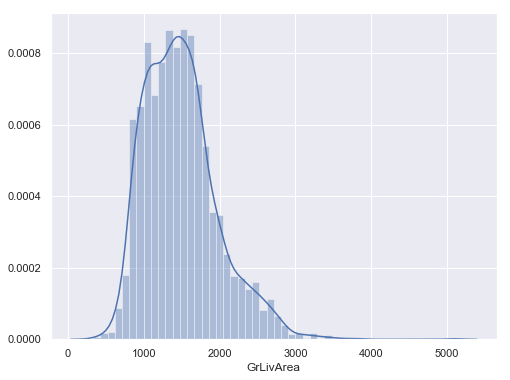

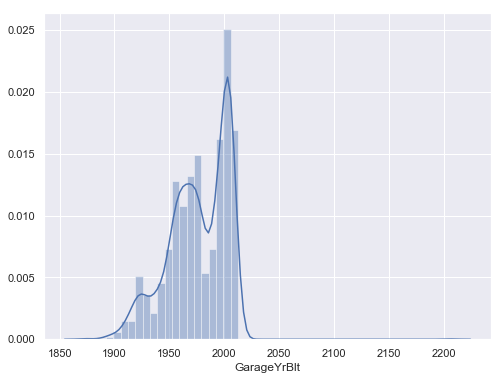

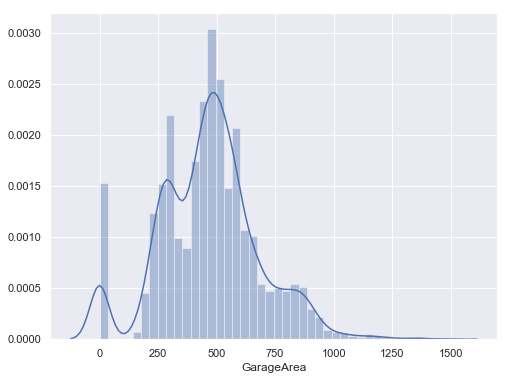

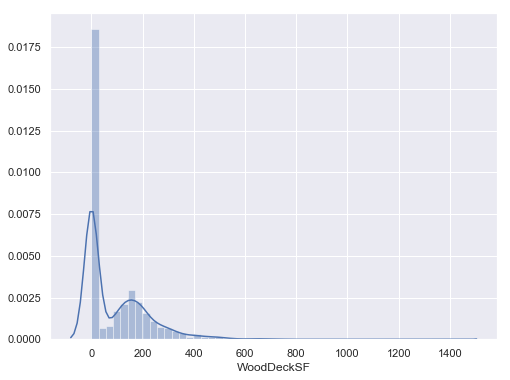

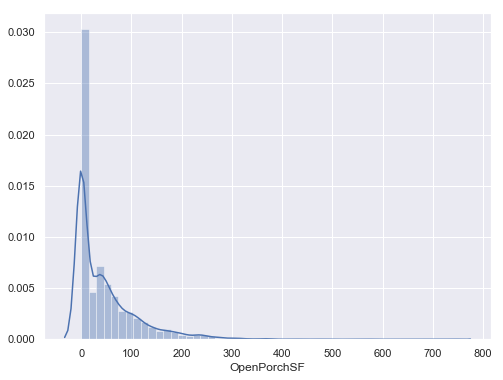

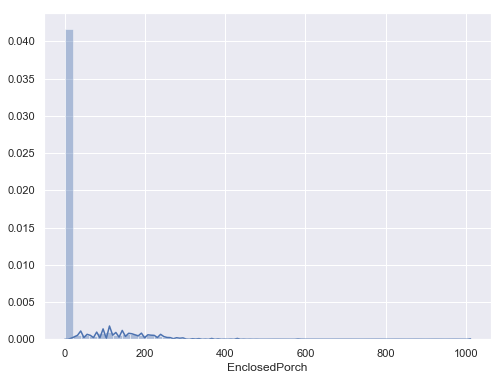

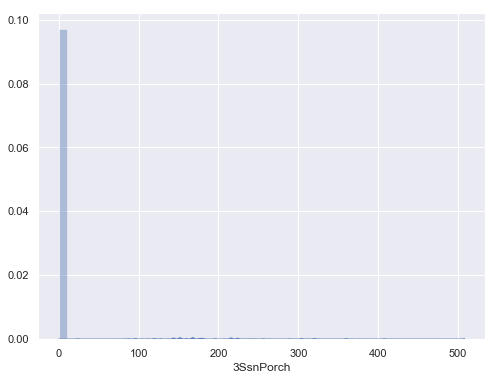

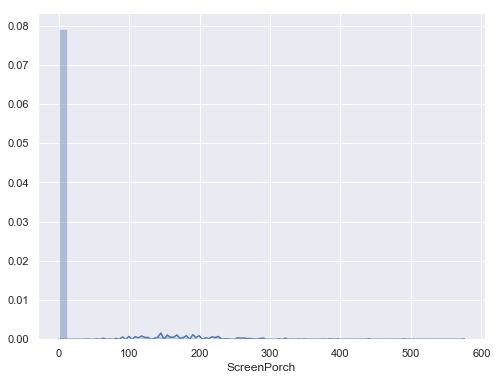

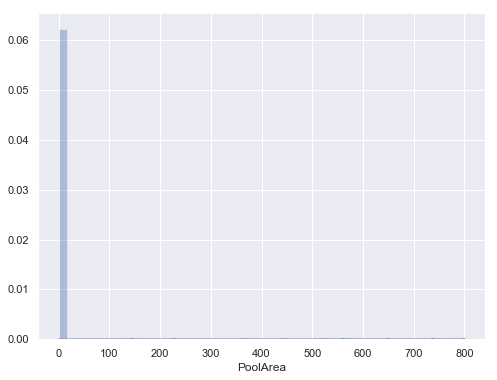

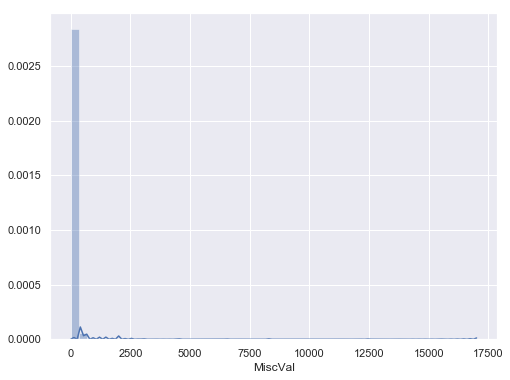

In [52]:
#log transform skewed features and target variable

for feature in num_features:
    f, ax = plt.subplots(figsize=(8, 6))
    fig = sns.distplot(features_noout[feature])

In [53]:
for feature in num_features:
    print (feature)
    print("Skewness: %f" % features_noout[feature].skew())
    print("Kurtosis: %f" % features_noout[feature].kurt())
    print ()

LotFrontage
Skewness: 0.808099
Kurtosis: 2.958447

LotArea
Skewness: 3.596366
Kurtosis: 26.764881

YearBuilt
Skewness: -0.593248
Kurtosis: -0.527862

YearRemodAdd
Skewness: -0.447387
Kurtosis: -1.350780

MasVnrArea
Skewness: 2.434068
Kurtosis: 7.554346

BsmtFinSF1
Skewness: 0.977623
Kurtosis: 1.443264

BsmtFinSF2
Skewness: 4.104853
Kurtosis: 18.239722

BsmtUnfSF
Skewness: 0.922241
Kurtosis: 0.412406

TotalBsmtSF
Skewness: 0.668898
Kurtosis: 3.794210

1stFlrSF
Skewness: 1.269705
Kurtosis: 5.241079

2ndFlrSF
Skewness: 0.832165
Kurtosis: -0.567978

LowQualFinSF
Skewness: 12.649965
Kurtosis: 193.190291

GrLivArea
Skewness: 0.940448
Kurtosis: 1.787587

GarageYrBlt
Skewness: -0.457128
Kurtosis: 1.438653

GarageArea
Skewness: 0.223048
Kurtosis: 0.895206

WoodDeckSF
Skewness: 1.809645
Kurtosis: 6.622284

OpenPorchSF
Skewness: 2.364930
Kurtosis: 9.752868

EnclosedPorch
Skewness: 3.950373
Kurtosis: 28.142344

3SsnPorch
Skewness: 11.344021
Kurtosis: 148.409974

ScreenPorch
Skewness: 3.882867
Kurt

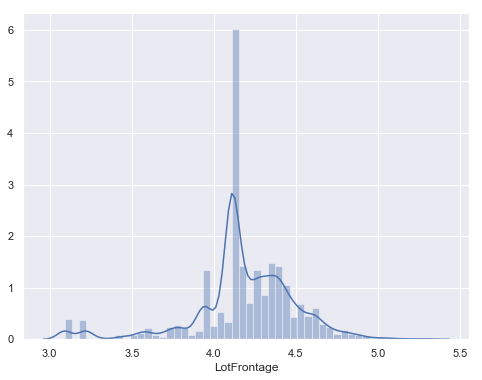

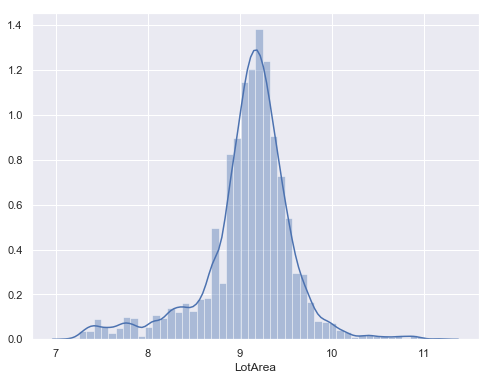

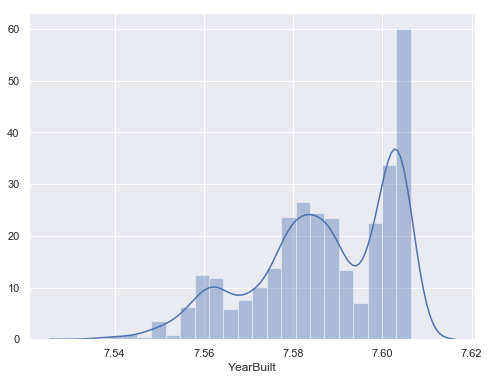

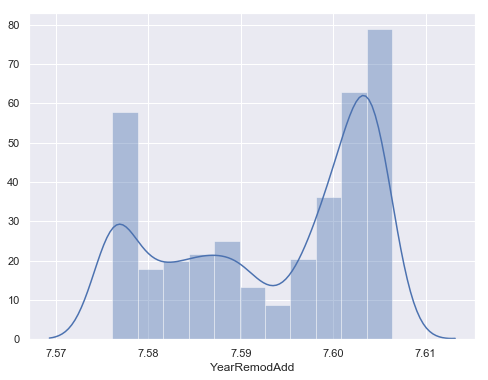

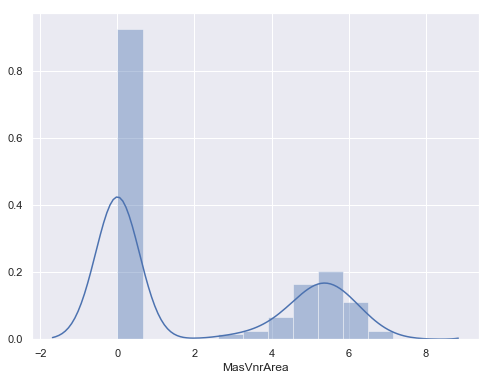

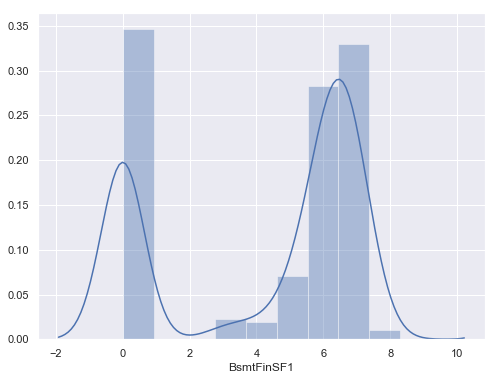

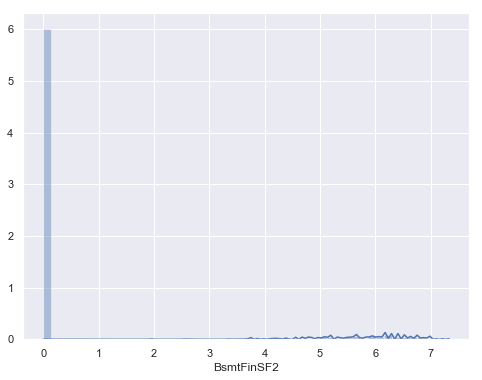

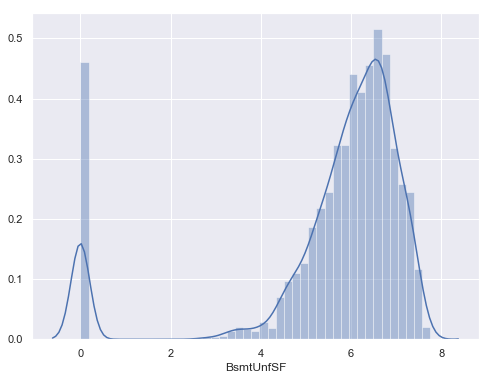

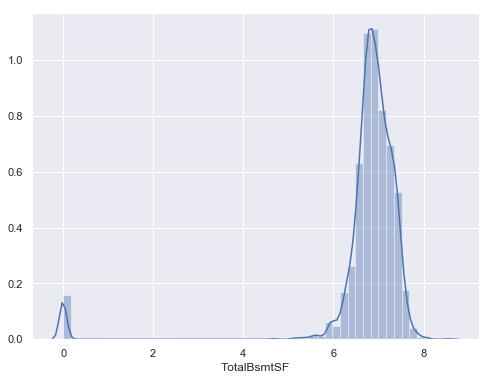

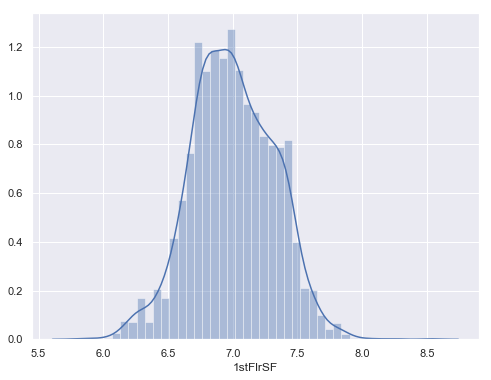

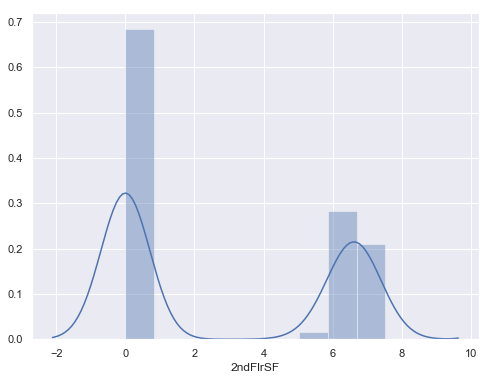

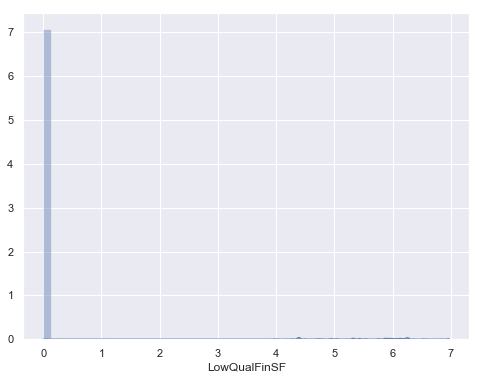

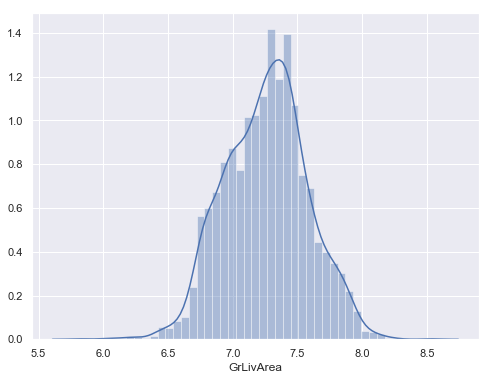

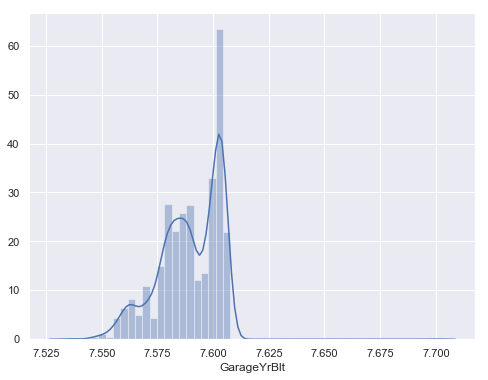

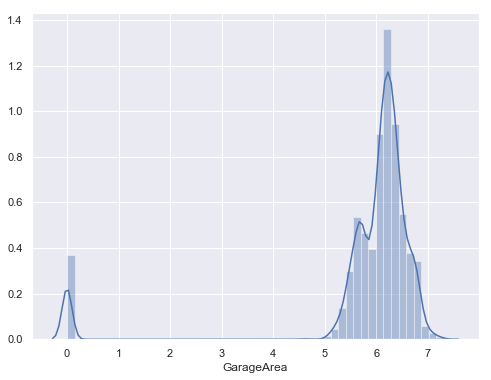

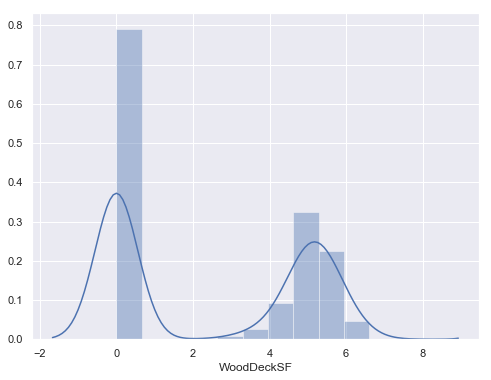

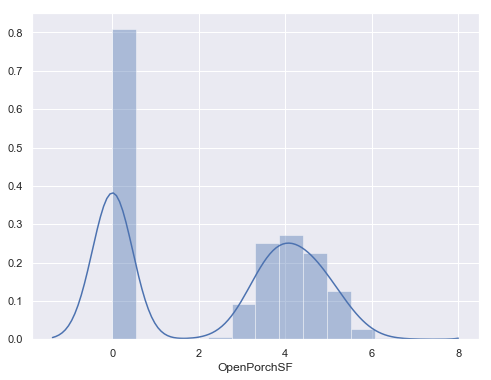

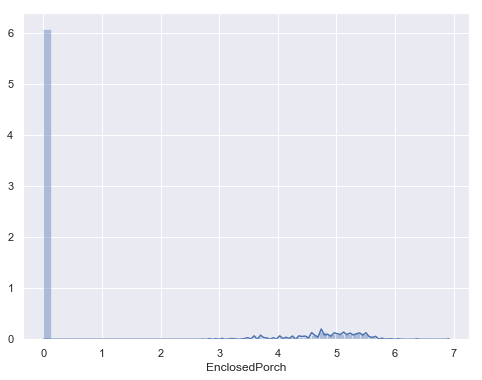

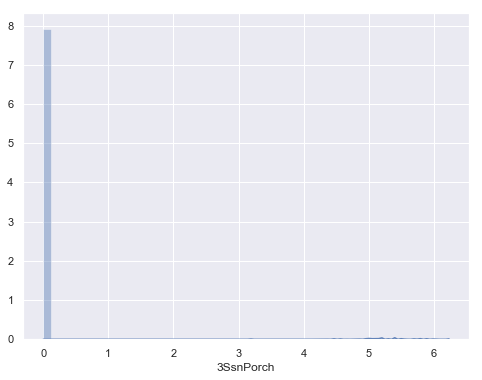

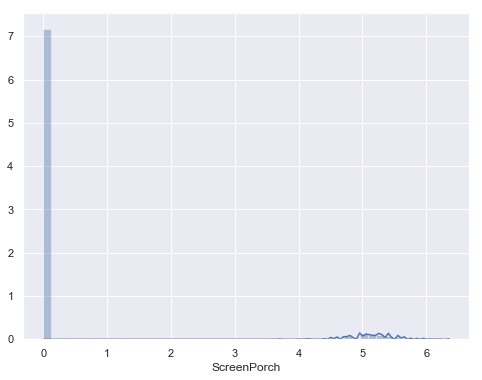

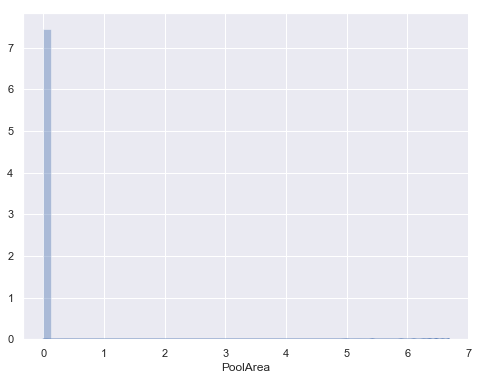

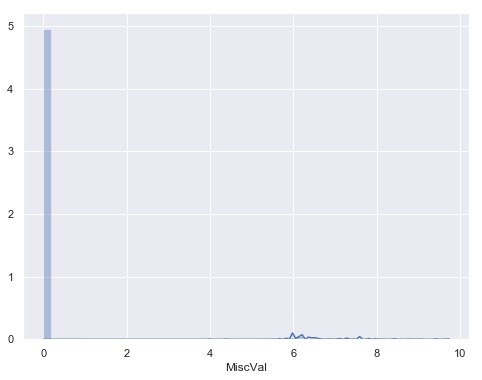

In [54]:
# we will log transform all numerical features and our target variable

features_logtrns = features_noout.copy()

for feature in num_features:
    features_logtrns[feature] = features_logtrns[feature].apply(lambda x: np.log(x+1))
    f, ax = plt.subplots(figsize=(8, 6))
    fig = sns.distplot(features_logtrns[feature])

#### Now we will normalize our numerical features

In [55]:
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)

features_norm = features_logtrns.copy()

features_norm[num_features] = scaler.fit_transform(features_norm[num_features])

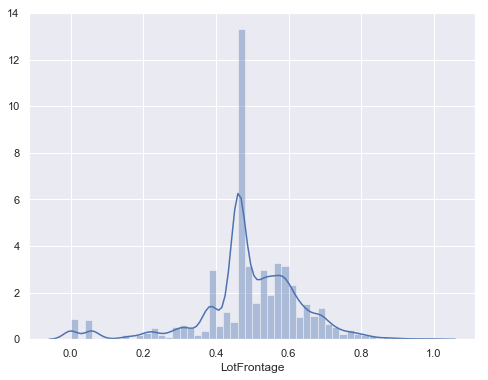

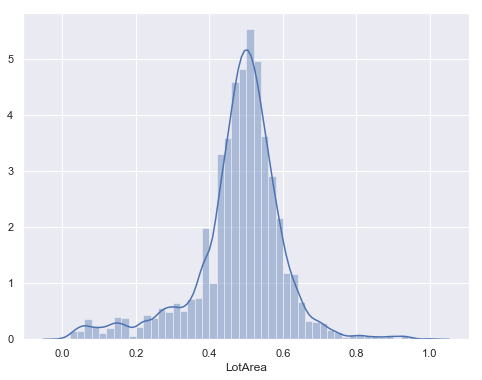

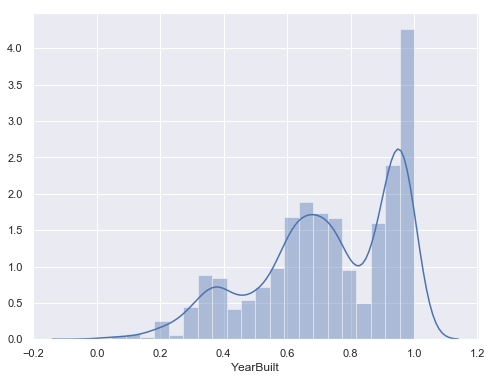

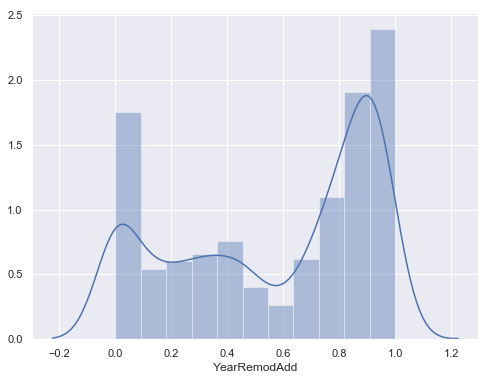

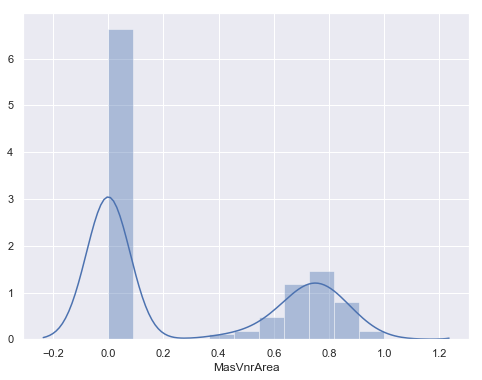

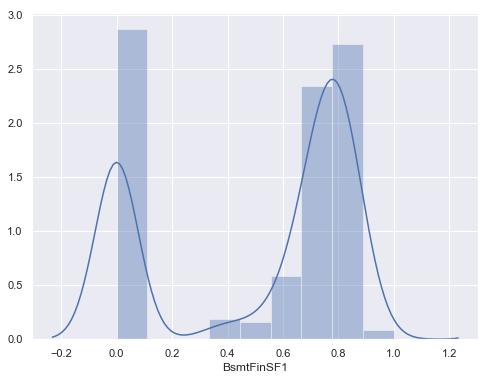

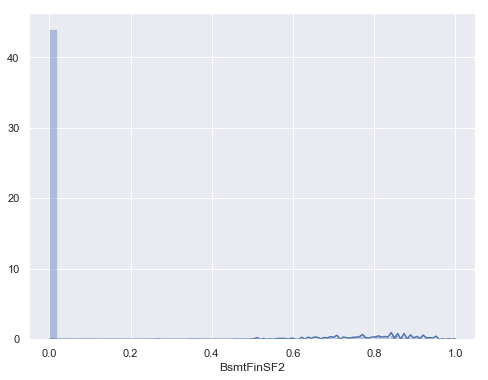

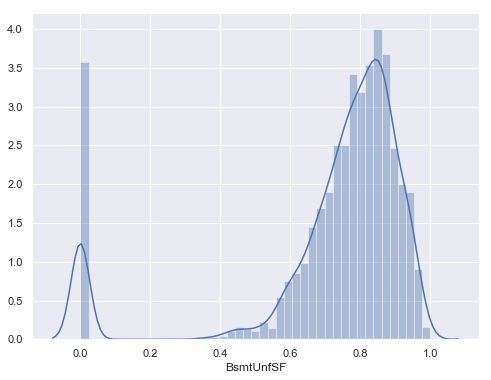

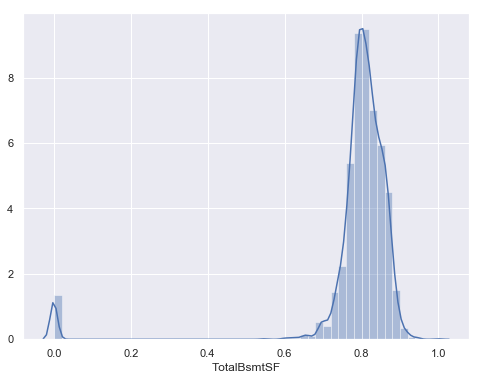

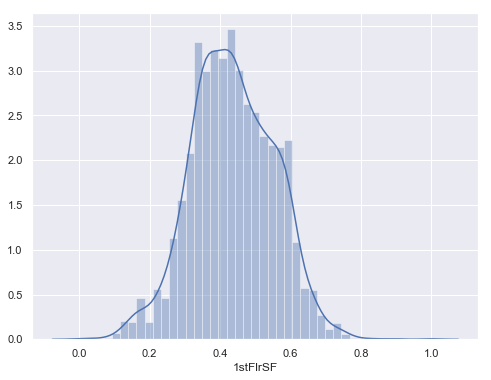

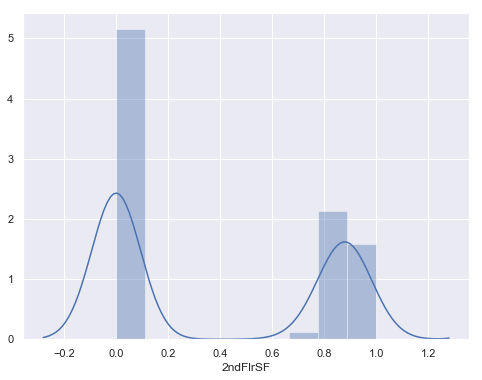

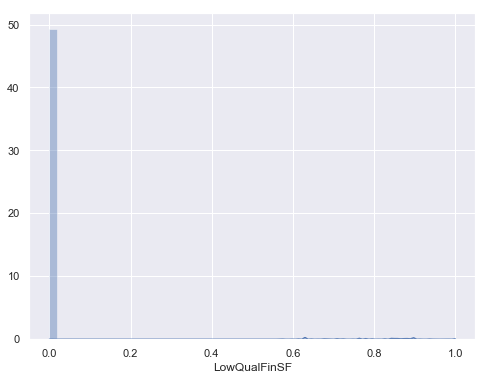

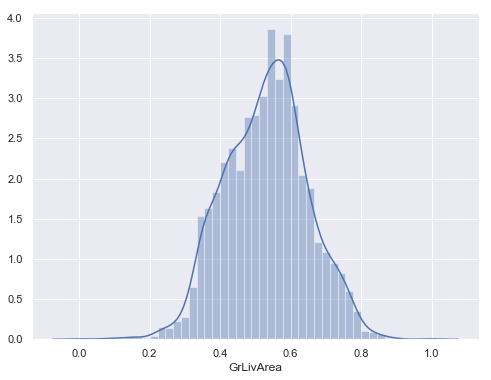

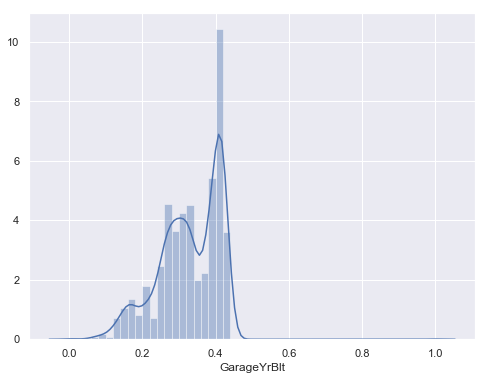

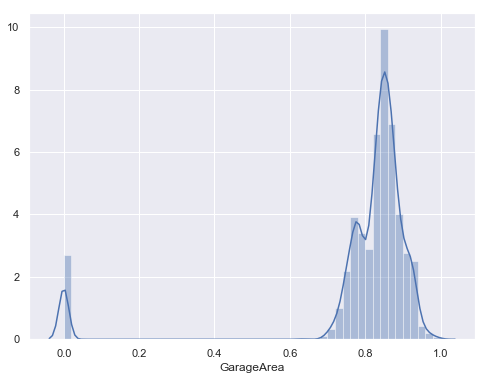

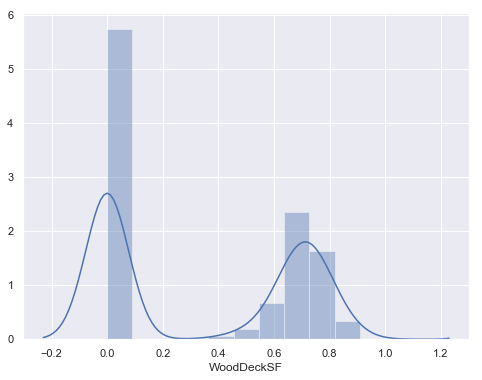

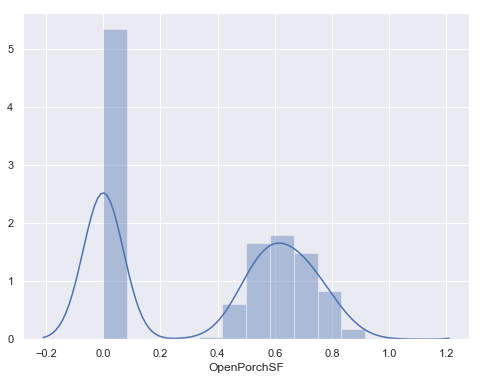

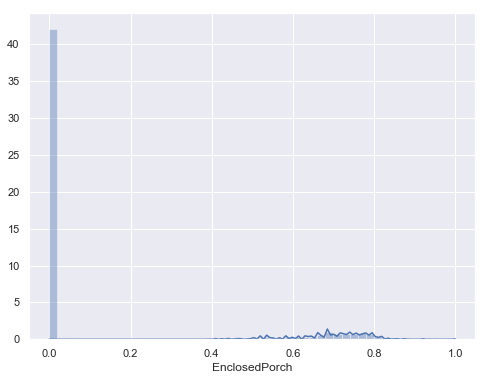

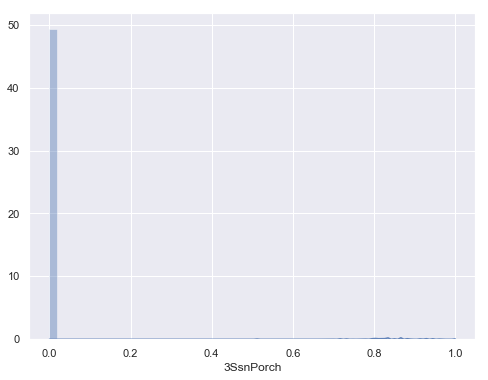

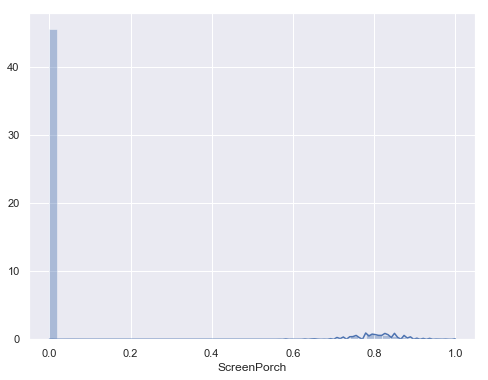

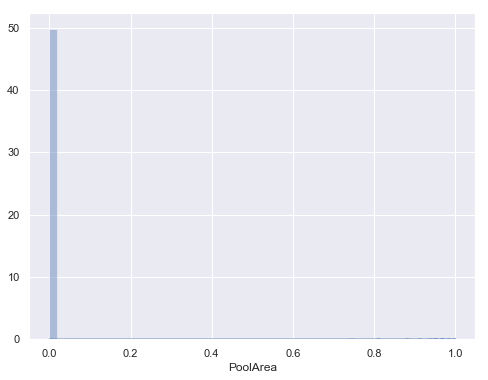

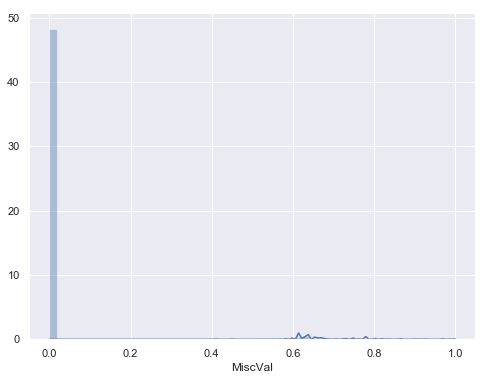

In [56]:
for feature in num_features:
    f, ax = plt.subplots(figsize=(8, 6))
    fig = sns.distplot(features_norm[feature])

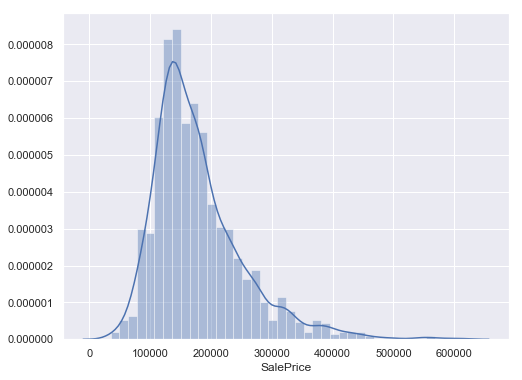

In [57]:
#we can choose to log-transform and normalize our target variable or not

f, ax = plt.subplots(figsize=(8, 6))
fig = sns.distplot(target_noout)

In [187]:
target_final = target_noout.copy()

target_final = target_final.apply(lambda x: np.log(x+1))

target_min = target_final.min()

target_max = target_final.max()

target_final = scaler.fit_transform(target_final.values.reshape(-1,1))


print(target_final)

print(target_min)

print(target_max)

[[0.62263388]
 [0.57400658]
 [0.64699337]
 ...
 [0.70869224]
 [0.48825923]
 [0.50127523]]
10.471978128496518
13.323928581764989


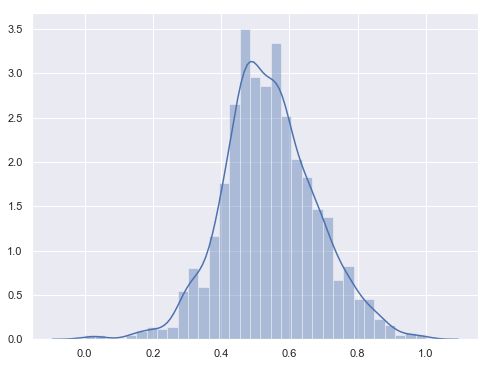

In [166]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.distplot(target_final)

#### One-hot encode categorical variables

In [58]:
#using pandas get_dummies

features_onehot = pd.get_dummies(features_norm, columns=cat_features, dummy_na=False)  
#we can also consider setting dummy_na to True to indicate Nan entries as a seperate column

In [59]:
features_onehot.iloc[0:20]

LotFrontage   LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0      0.496601  0.468234   0.950951      0.884882    0.737551    0.790791   
1      0.589174  0.500160   0.760143      0.437057    0.000000    0.830023   
2      0.516695  0.539845   0.936906      0.868404    0.711103    0.745862   
3      0.460990  0.498853   0.319286      0.336710    0.000000    0.648431   
4      0.610962  0.599170   0.929878      0.835423    0.818183    0.781767   
5      0.616249  0.596612   0.880583      0.752825    0.000000    0.795144   
6      0.560372  0.512467   0.957968      0.917814    0.730278    0.870525   
7      0.460990  0.519754   0.738782      0.386922    0.765694    0.814403   
8      0.388833  0.387517   0.436264      0.000000    0.000000    0.000000   
9      0.380056  0.435710   0.494390      0.000000    0.000000    0.813276   
10     0.529610  0.538731   0.681659      0.252854    0.000000    0.820816   
11     0.616249  0.554404   0.964982      0.934267    0.790080    0.832460   
12     0.460990  0.575405   0.660178      0.202438    0.000000    0.795963   
13     0.646734  0.526178   0.971993      0.950713    0.799485    0.000000   
14     0.460990  0.532396   0.645839      0.168784    0.748452    0.795308   
15     0.388833  0.387517   0.421695      0.851917    0.000000    0.000000   
16     0.460990  0.539645   0.717388      0.336710    0.725726    0.766718   
17     0.542168  0.529422   0.695961      0.286422    0.000000    0.000000   
18     0.503399  0.589054   0.957968      0.901352    0.000000    0.780102   
19     0.529610  0.440387   0.631485      0.252854    0.000000    0.750236   

    BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0     0.000000   0.646838     0.791152  0.345070  0.896567           0.0   
1     0.000000   0.728731     0.836583  0.487537  0.000000           0.0   
2     0.000000   0.783246     0.799589  0.371528  0.898418           0.0   
3     0.000000   0.811361     0.776617  0.387529  0.880400           0.0   
4     0.000000   0.798858     0.825194  0.451824  0.924356           0.0   
5     0.000000   0.538171     0.782649  0.318405  0.842020           0.0   
6     0.000000   0.742856     0.870492  0.595613  0.000000           0.0   
7     0.476944   0.693588     0.821244  0.439436  0.915229           0.0   
8     0.000000   0.884356     0.803590  0.410114  0.879697           0.0   
9     0.000000   0.638004     0.808289  0.429353  0.000000           0.0   
10    0.000000   0.632398     0.813937  0.416522  0.000000           0.0   
11    0.000000   0.668046     0.828222  0.463498  0.935121           0.0   
12    0.000000   0.666590     0.798567  0.368323  0.000000           0.0   
13    0.000000   0.942405     0.856338  0.549488  0.000000           0.0   
14    0.000000   0.806504     0.835745  0.484910  0.000000           0.0   
15    0.000000   0.867005     0.787824  0.344211  0.000000           0.0   
16    0.000000   0.780853     0.809814  0.403593  0.000000           0.0   
17    0.000000   0.000000     0.000000  0.497296  0.000000           0.0   
18    0.000000   0.792948     0.821982  0.441750  0.000000           0.0   
19    0.000000   0.807736     0.812692  0.509277  0.000000           0.0   

    GrLivArea  GarageYrBlt  GarageArea  WoodDeckSF  OpenPorchSF  \
0    0.599065     0.410851    0.863430    0.000000     0.624312   
1    0.487537     0.328414    0.839518    0.784977     0.000000   
2    0.615031     0.404783    0.877627    0.000000     0.568957   
3    0.600565     0.395669    0.885063    0.000000     0.542079   
4    0.691246     0.401746    0.921154    0.724696     0.672040   
5    0.515530     0.380449    0.845331    0.511376     0.519459   
6    0.595613     0.413883    0.883780    0.763596     0.614223   
7    0.672745     0.319185    0.846464    0.752394     0.805212   
8    0.612555     0.188484    0.841873    0.621166     0.000000   
9    0.429353     0.213597    0.729261    0.000000     0.243460   
10   0.416522     0.294505    0

In [60]:
print (features_onehot.shape)

(2900, 377)


## Now that the Data is prepared, lets see if we can answer question #2:  Is there a particular time of the year a home can sell for more money? or less money?

To answer this question, we want to know if the price of a home has a trend to sell for more or less money in certain months.  Lets explore:

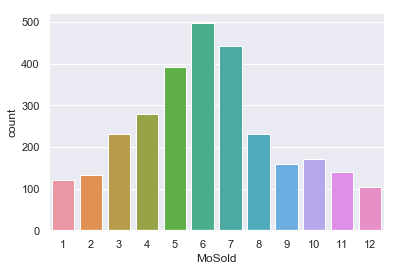

In [61]:
#first lets look at if there are particular months in which we can expect more home sales

data = features_noout[['MoSold','YrSold']]

ax = sns.countplot(x='MoSold',data=data)

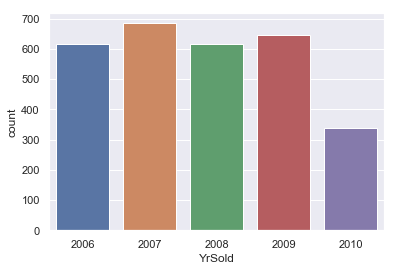

In [62]:
data = features_noout[['MoSold','YrSold']]

ax = sns.countplot(x='YrSold',data=data)

1. We can see that there tends to be more home sales in June and July, 5 times as many as Jan or December.

2. since we don't seem to have a full dataset for 2010 (we are assuming that 2010 had similar sales numbers as the previous years), we will drop it from the data set when trending home sales

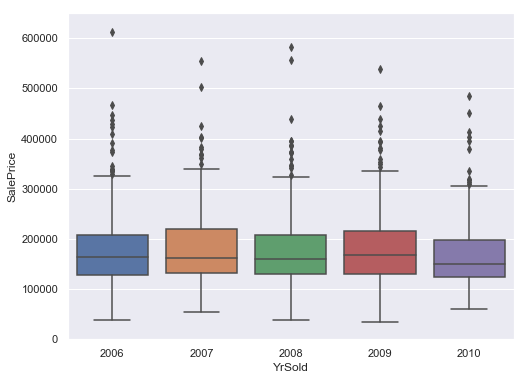

In [63]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=features_noout['YrSold'], y=target_noout, data=features_noout)
fig.axis(ymin=0, ymax=650000);

We can see there isnt a prevalent increasing or decreasing trend, year over year, so our monthly analysis would not be highly skewed by an overall increasing or decreasing trend, lets look further at the monthly trend.

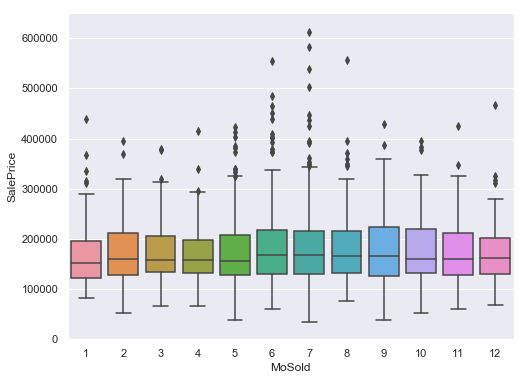

In [64]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=features_noout['MoSold'], y=target_noout, data=features_noout)
fig.axis(ymin=0, ymax=650000);

Although we have more home sales in June and July, these houses do not sell for significantly more or less than homes sold in other months, based on the box plot above.  We see no clear trend indicating a month that will result in a higher or lower price.

## Data Modelling

Now we will begin by creating a baseline model and creating some baseline scoring metrics.  We will then explore other models, training/validation sets, hyper-parameter tuning, and changes to the way we prepared our data.

## We will also answer Question 3: Can we accurately predict the price that a home will sell for with descriptive data on a home? Using a simple model?

In [177]:
#lets try to fit a simple regression model
#since we have a seperate test set provided, we will not split our training set to train and test

from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

#this is how we will score our fit to the linear model
def rmse_cv(model, X, Y):
    
    rmse = np.sqrt(-cross_val_score(model, X, Y, scoring="neg_mean_squared_error", cv = 5))
    
    return(rmse)

Text(0, 0.5, 'RMSE')

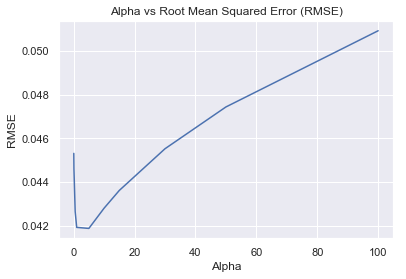

In [179]:
# try different alpha values and find a min using Ridge linear regression from sklearn

alphas = [0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 15.0, 30.0, 50.0, 100.0]

cv_ridge = [rmse_cv(Ridge(alpha = alpha), features_onehot[0:train_size_noout], target_final).mean() for alpha in alphas]

cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Alpha vs Root Mean Squared Error (RMSE)")
plt.xlabel("Alpha")
plt.ylabel("RMSE")

In [176]:
cv_ridge

0.05      0.045311
0.10      0.044609
0.50      0.042650
1.00      0.041919
5.00      0.041871
10.00     0.042799
15.00     0.043613
30.00     0.045522
50.00     0.047437
100.00    0.050930
dtype: float64

In [180]:
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(features_onehot[0:train_size_noout], target_final)

rmse_cv(model_lasso, features_onehot[0:train_size_noout], target_final).mean()

0.041981270818740965

We can see that the RMSE is too high, we would like it to be as close as possible to 0.  We have tried two different linear regression models that cannot fit the data.  We can try two things:

1. Fit the model to fewer features
2. Try a differnt type of model

Considering that we have a mix of categorical and continuous variables, lets revisit our features and see if we can use a few highly correlated continuous variables to accurately predict our Sale Price in a linear regression model.

In [181]:
model = Ridge(alpha=5)

model.fit(features_onehot[0:train_size_noout], target_final)


predictions = model.predict(features_onehot[train_size_noout:])

In [188]:
print(predictions)

print(predictions.shape)

[[0.43970311]
 [0.52589662]
 [0.57375586]
 ...
 [0.54303011]
 [0.42578506]
 [0.63920973]]
(1459, 1)


In [189]:
#we need to unscale and take the exponent of our predictions to be able to compare them to the test

scaler = MinMaxScaler(feature_range=(target_min, target_max),copy=True)

predictions_final = scaler.fit_transform(predictions)

In [191]:
print(predictions_final)

print(predictions_final.shape)

[[11.67291004]
 [11.95289834]
 [12.10836278]
 ...
 [12.00855423]
 [11.62769907]
 [12.32098106]]
(1459, 1)


In [193]:
import numpy as np
x = np.array([1, 2, 3, 4, 5])
f = lambda x: x ** 2
squares = f(x)

f = lambda x: np.expm1(x)

predictions_final = f(predictions_final)

In [194]:
print(predictions_final)

print(predictions_final.shape)

[[117348.27754786]
 [155265.50959284]
 [181381.39760403]
 ...
 [164152.0047111 ]
 [112160.94781064]
 [224353.13791641]]
(1459, 1)


In [195]:
submission = pd.DataFrame()

submission['Id'] = range(1461,2920,1)
submission['SalePrice'] = predictions

In [196]:
submission.to_csv(path_or_buf='submissions.csv', sep=',', header=True, index=False)

This resulted in a RMSE of 0.11, which is a good start and fairly accurate for a simple regression model with all features accounted for.